<a href="https://colab.research.google.com/github/IrawanRiyaldi/Irawan/blob/main/FINAL_PROJECT_by_HEXAGON_GROUP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FINAL PROJECT

Data berisi observasi yang dilakukan oleh Sloan Digital Sky Survey (SDSS) dan memberikan informasi berharga tentang bintang, galaksi, dan quasar. Tugas ini bertujuan untuk mengklasifikasikan benda langit kedalam klasifikasi yang sesuai.

**Konteks**
Dalam astronomi, klasifikasi bintang adalah pengklasifikasian bintang berdasarkan karakteristik spektralnya. Skema klasifikasi galaksi, quasar, dan bintang adalah salah satu skema paling mendasar dalam astronomi. Pengkatalogan awal bintang-bintang dan distribusinya di langit telah membawa pada pemahaman bahwa mereka membentuk galaksi kita sendiri dan, mengikuti perbedaan bahwa Andromeda adalah galaksi yang terpisah dari galaksi kita, banyak galaksi mulai disurvei seiring dengan dibangunnya teleskop yang lebih canggih. . Datasat ini bertujuan untuk mengklasifikasikan bintang, galaksi, dan quasar berdasarkan karakteristik spektralnya.

**Isi**
Data tersebut terdiri dari 100.000 observasi luar angkasa yang dilakukan oleh SDSS (Sloan Digital Sky Survey). Setiap observasi dijelaskan oleh 17 kolom fitur dan 1 kolom kelas yang mengidentifikasinya sebagai bintang, galaksi, atau quasar.

1. obj_ID = Object Identifier, nilai unik yang mengidentifikasi objek dalam katalog gambar yang digunakan oleh CAS
2. alpha = Sudut Kenaikan Kanan (pada epoch J2000)
3. delta = Sudut deklinasi (pada epoch J2000)
4. u = Filter ultraviolet pada sistem fotometrik
5. g = Filter hijau pada sistem fotometrik
6. r = Filter merah pada sistem fotometrik
7. i = Filter Inframerah Dekat dalam sistem fotometrik
8. z = Filter inframerah dalam sistem fotometrik
9. run_ID = Nomor Proses yang digunakan untuk mengidentifikasi pemindaian tertentu
10. rereun_ID = Jalankan Ulang Nomor untuk menentukan cara pemrosesan gambar
11. cam_col = Kolom kamera untuk mengidentifikasi garis pindaian dalam proses
12. field_ID = Nomor bidang untuk mengidentifikasi setiap bidang
13. spec_obj_ID = ID unik yang digunakan untuk objek spektroskopi optik (artinya 2 pengamatan berbeda dengan spec_obj_ID yang sama harus berbagi kelas keluaran)
14. class = kelas objek (objek galaksi, bintang, atau quasar)
15. redshift = nilai pergeseran merah berdasarkan pertambahan panjang gelombang
16. plate = plate ID, mengidentifikasi setiap plate di SDSS
17. MJD = Tanggal Julian yang Dimodifikasi, digunakan untuk menunjukkan kapan suatu bagian data SDSS diambil
18. fiber_ID = fiber ID yang mengidentifikasi fiber yang mengarahkan cahaya pada bidang fokus pada setiap pengamatan

In [ ]:
'''Berikut Library pada Python yang digunakan untuk menyelesaikan Project ini:'''

#Import Numpy Library:
import numpy as np #mengimpor library NumPy yang sering digunakan untuk operasi numerik dan komputasi array.

#Import Matplotlib Library:
import matplotlib.pyplot as plt #Mengimpor library Matplotlib untuk visualisasi data, terutama plotting.

#Import Pandas Library:
import pandas as pd #Mengimpor library Pandas untuk manipulasi dan analisis data, terutama menggunakan struktur data DataFrame.

#Import Seaborn Library:
import seaborn as sns #untuk membuat plot statistik yang estetis.

#Import SciPy's norm and skew Functions:
from scipy.stats import norm, skew #fungsi norm dan skew dari modul statistik SciPy. norm digunakan untuk distribusi normal, dan skew untuk mengukur kemiringan distribusi.

#Import Stats Module from SciPy:
from scipy import stats #untuk  berbagai fungsi statistik

#Import Statsmodels Library:
import statsmodels.api as sm #digunakan untuk analisis statistik dan regresi

#Import Machine Learning Models from Scikit-Learn:
#Library berikut merupakan model machine learning dari Scikit-Learn untuk klasifikasi dan analisis data.
from sklearn import svm, tree, linear_model, neighbors
'''
*) SVM (Support Vector Machine) adalah algoritma pembelajaran mesin untuk klasifikasi dan regresi. Ini mencari hyperplane terbaik yang memisahkan dua kelas dalam ruang fitur.
*) Tree atau Pohon keputusan adalah model pembelajaran mesin yang membangun struktur pohon untuk pengambilan keputusan berbasis fitur.
*) Linear model dapat mencakup model seperti regresi linear dan regresi logistik, yang umumnya digunakan untuk tugas-tugas klasifikasi dan regresi.
*) KNN (K-Nearest Neighbors) adalah algoritma di mana prediksi untuk sebuah titik data didasarkan pada mayoritas label tetangga terdekatnya.
'''

from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
'''
*) Naive Bayes adalah keluarga algoritma klasifikasi yang berdasarkan pada teorema Bayes dan mengasumsikan independensi antara fitur-fitur
*) ensemble merupakan algoritma pembelajaran mesin ensemble seperti Random Forest dan Gradient Boosting yang menggabungkan beberapa model untuk meningkatkan kinerja
*) Discriminant Analysis mencakup Linear Discriminant Analysis (LDA), yang digunakan untuk mencari pemisah terbaik antara kelas dalam ruang fitur.
*) Gaussian Process adalah metode non-parametrik yang digunakan untuk estimasi fungsi yang kompleks.
'''

from sklearn.neighbors import KNeighborsClassifier #KNeighborsClassifier adalah implementasi KNN khusus untuk tugas klasifikasi.
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis #LinearDiscriminantAnalysis adalah implementasi LDA khusus untuk analisis diskriminan.
from xgboost import XGBClassifier #XGBoost adalah implementasi yang dioptimalkan dari algoritma Gradient Boosting yang sangat efisien dan sering digunakan dalam kompetisi pembelajaran mesin.
from sklearn.linear_model import LogisticRegression #Regresi logistik adalah model regresi biner yang digunakan untuk tugas klasifikasi.
from sklearn.svm import SVC #Implementasi khusus dari Support Vector Machine untuk klasifikasi (SVC).
from sklearn.neighbors import KNeighborsClassifier #KNeighborsClassifier adalah implementasi KNN khusus untuk tugas klasifikasi.
from sklearn.naive_bayes import GaussianNB #Implementasi khusus dari Naive Bayes untuk klasifikasi (GaussianNB).
from sklearn.tree import DecisionTreeClassifier #Implementasi khusus dari pohon keputusan untuk klasifikasi.
from sklearn.ensemble import RandomForestClassifier #Implementasi khusus dari Random Forest untuk tugas klasifikasi.

#Import Metrics for Model Evaluation:
#Library berikut mengimpor berbagai metrik evaluasi model dari Scikit-Learn
from sklearn.metrics import confusion_matrix, accuracy_score
'''
*) Confusion matrix adalah tabel yang digunakan untuk mengevaluasi kinerja suatu model klasifikasi. Ini menyajikan informasi tentang jumlah prediksi yang benar dan salah untuk setiap kelas.
*) Accuracy score adalah metrik yang mengukur sejauh mana model klasifikasi memberikan prediksi yang benar secara keseluruhan. Ini dihitung sebagai jumlah prediksi benar dibagi dengan total jumlah prediksi.
'''

from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
'''
*) F1 score adalah metrik yang menggabungkan presisi (precision) dan recall. Ini memberikan keseimbangan antara kedua metrik tersebut dan berguna ketika kelas positif dan negatif tidak seimbang.
*) Precision (presisi) adalah rasio dari jumlah prediksi positif benar (True Positive) dibandingkan dengan total jumlah prediksi positif yang dibuat oleh model.
*) Recall (sensitivitas atau true positive rate) adalah rasio dari jumlah prediksi positif benar (True Positive) dibandingkan dengan total jumlah instance yang sebenarnya positif.
*) FBeta score adalah metrik umum yang memungkinkan Anda mengatur bobot antara presisi dan recall dengan mengggunakan parameter beta. Ketika beta = 1, ini setara dengan F1 score.
'''

#Import VIF (Variance Inflation Factor) from Statsmodels:
from statsmodels.stats.outliers_influence import variance_inflation_factor #fungsi VIF untuk mengukur sejauh mana variabel dalam model regresi saling bergantung.

#Import Cross-Validation and Grid Search:
#Libabry berikut merupakan modul untuk validasi silang (cross-validation) dan pencarian parameter grid untuk tuning model.
from sklearn.model_selection import cross_val_score
'''
cross_val_score adalah fungsi yang digunakan untuk melakukan validasi silang pada model, membagi dataset menjadi beberapa lipatan (folds) dan mengukur kinerja model pada setiap lipatan.
Berguna untuk mengevaluasi performa model secara lebih konsisten.
'''
from sklearn.model_selection import GridSearchCV
'''
GridSearchCV adalah kelas yang digunakan untuk mencari kombinasi parameter yang optimal untuk model, melakukan pencarian parameter menggunakan metode grid search,
yaitu dengan mencoba semua kombinasi parameter yang mungkin.
'''
from sklearn.model_selection import ShuffleSplit
'''
ShuffleSplit adalah kelas yang mengimplementasikan skema validasi silang berulang dengan acak, berguna ketika Anda ingin membagi dataset menjadi lipatan secara acak untuk beberapa kali percobaan.
'''
from sklearn.model_selection import KFold
'''
KFold adalah kelas yang membagi dataset menjadi k lipatan (folds) untuk validasi silang.
Setiap lipatan digunakan satu kali sebagai set validasi sementara k-1 lipatan lainnya digunakan sebagai set pelatihan.
'''
from sklearn.model_selection import train_test_split
'''
train_test_split adalah fungsi yang membagi dataset menjadi dua bagian:
satu untuk pelatihan model dan satu untuk menguji model, berguna saat ingin mengukur performa model pada data yang belum pernah dilihat sebelumnya.
'''

#Import Feature Selection from Scikit-Learn:
from sklearn import feature_selection #modul untuk pemilihan fitur.

#Import Miscellaneous Model Selection Tools:
from sklearn import model_selection #untuk pemodelan dari Scikit-Learn

#Import Metrics and Visualization for Model Evaluation:
#Library berikut berfungsi mengimpor metrik dan alat visualisasi untuk evaluasi model.
from sklearn import metrics #metrics adalah modul dalam scikit-learn yang menyediakan berbagai metrik evaluasi kinerja model, seperti akurasi, presisi, recall, F1 score, dll.
from sklearn.metrics import classification_report, precision_recall_curve
'''
*) classification_report adalah fungsi yang menghasilkan laporan klasifikasi yang mencakup berbagai metrik evaluasi seperti precision, recall, dan F1 score untuk setiap kelas.
*) precision_recall_curve adalah fungsi yang menghitung presisi dan recall untuk berbagai threshold dan menghasilkan kurva presisi-recall.
'''
from sklearn.metrics import auc, roc_auc_score, roc_curve
'''
*) Area Under the Curve (AUC) adalah fungsi yang menghitung luas area di bawah kurva (AUC) untuk kurva presisi-recall atau kurva Receiver Operating Characteristic (ROC)
*) Receiver Operating Characteristic (ROC)AUC Score adalah fungsi yang menghitung AUC untuk kurva ROC, yang mengukur seberapa baik model dapat membedakan antara kelas positif dan negatif.
*) roc_curve adalah fungsi yang menghasilkan nilai false positive rate (FPR) dan true positive rate (TPR) untuk berbagai threshold dan digunakan untuk membuat kurva ROC.
'''
from sklearn.metrics import make_scorer, recall_score, log_loss
'''
*) make_scorer adalah fungsi yang mengubah fungsi performa model (misalnya, presisi atau recall) menjadi skor yang dapat digunakan dengan fungsi GridSearchCV pada scikit-learn.
*) recall_score adalah fungsi yang menghitung recall (sensitivitas) dari prediksi model terhadap data sebenarnya.
*) log_loss adalah fungsi yang mengukur kinerja model klasifikasi dengan menghitung logaritma likelihood dari prediksi model.
'''
from sklearn.metrics import average_precision_score #menghitung nilai presisi rata-rata di seluruh berbagai tingkat recall.
from sklearn.metrics import confusion_matrix, classification_report
'''
*) confusion_matrix memberikan matriks yang membandingkan prediksi dengan nilai sebenarnya.
*) classification_report memberikan laporan klasifikasi yang mencakup berbagai metrik evaluasi.
'''

#Import SMOTE (Synthetic Minority Over-sampling Technique) from Imbalanced-Learn:
from imblearn.over_sampling import SMOTE #teknik oversampling untuk menangani ketidakseimbangan kelas

#Import Additional Visualization Tools:
#Library berikut untuk visualisasi tambahan
from matplotlib import pyplot #mengimpor modul pyplot dari Matplotlib. pyplot menyediakan fungsi-fungsi untuk membuat plot dan grafik
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib

#Set Matplotlib Inline Plotting:
%matplotlib inline

#Set Seaborn Color Palette:
color = sns.color_palette() #Mengatur palet warna untuk Seaborn

#Import Additional Matplotlib Tools:
import matplotlib.ticker as mtick #fungsi tambahan untuk plot Matplotlib

#Import IPython Display Module:
from IPython.display import display #fungsi display untuk menampilkan objek di IPython

#Set Pandas Display Option:
pd.options.display.max_columns = None #Mengatur opsi Pandas untuk menampilkan semua kolom dalam output

#Import Scatter Matrix Plotting:
from pandas.plotting import scatter_matrix #fungsi untuk membuat matriks scatter plot

#Import ROC Curve Tools:
from sklearn.metrics import roc_curve #untuk membuat kurva ROC

#Import XGBoost:
import xgboost as xgb #pustaka XGBoost, yang merupakan implementasi yang dioptimalkan dari algoritma gradient boosting

#Import Random Module:
import random #modul acak untuk menghasilkan angka atau urutan acak

#Import OS Module:
import os #modul sistem operasi untuk interaksi dengan sistem file

#Import Regular Expression Module:
import re #modul ekspresi reguler untuk pencarian pola dalam teks

#Import System Module:
import sys #modul sistem untuk interaksi dengan interpreter Python

#Import Timeit Module:
import timeit #modul timeit untuk mengukur waktu eksekusi suatu pernyataan atau blok kode

#Import String Module:
import string #modul string yang menyediakan berbagai operasi pada string

#Import Time Module:
import time # modul waktu untuk bekerja dengan waktu dan penundaan

#Import Datetime Module:
from datetime import datetime #kelas datetime dari modul datetime untuk manipulasi tanggal dan waktu

#Import Time Function from Time Module:
from time import time # fungsi time dari modul time untuk mendapatkan waktu saat ini

#Import Parse Function from Dateutil Parser:
from dateutil.parser import parse #fungsi parse dari pustaka dateutil untuk mengurai string tanggal

#Import Joblib Module:
import joblib #modul joblib yang digunakan untuk menyimpan dan memuat objek besar dengan efisien.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
filename = 'star_classification.csv'
search_path = '/content/drive/My Drive'
file = '/content/drive/MyDrive/Colab Notebooks/star_classification.csv'

Mounted at /content/drive


In [ ]:
dataset = pd.read_csv(file) #Membaca dataset

In [ ]:
dataset #Menampilkan dataset

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


In [ ]:
dataset.shape #menyatakan jumlah baris dan kolom dalam dataset

(100000, 18)

In [ ]:
dataset.columns #array yang berisi nama-nama kolom dari DataFrame

Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift',
       'plate', 'MJD', 'fiber_ID'],
      dtype='object')

In [ ]:
dataset.info() # informasi rinci tentang struktur dan tipe data yang ada dalam DataFrame, termasuk jumlah non-null (non-missing) entri, tipe data setiap kolom, dan penggunaan memori.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [ ]:
dataset.isna().any() #mengecek apakah ada nilai null (NaN) atau nilai yang hilang dalam setiap kolom DataFrame
#berisi nilai Boolean, di mana nilai True menunjukkan adanya nilai null dalam kolom tersebut, dan False menunjukkan bahwa tidak ada nilai null.

obj_ID         False
alpha          False
delta          False
u              False
g              False
r              False
i              False
z              False
run_ID         False
rerun_ID       False
cam_col        False
field_ID       False
spec_obj_ID    False
class          False
redshift       False
plate          False
MJD            False
fiber_ID       False
dtype: bool

In [ ]:
dataset['class'].nunique() #menghitung jumlah nilai unik (distinct) dalam kolom 'class' dari DataFrame.

3

In [ ]:
dataset['class'].unique() #untuk mengembalikan nilai-nilai unik (distinct) yang ada dalam kolom 'class' dari DataFrame.

array(['GALAXY', 'QSO', 'STAR'], dtype=object)

In [ ]:
dataset['class'].value_counts() #untuk menghitung jumlah kemunculan setiap nilai unik dalam kolom 'class' dari DataFrame.

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64

# **DATA VISUALIZATION**

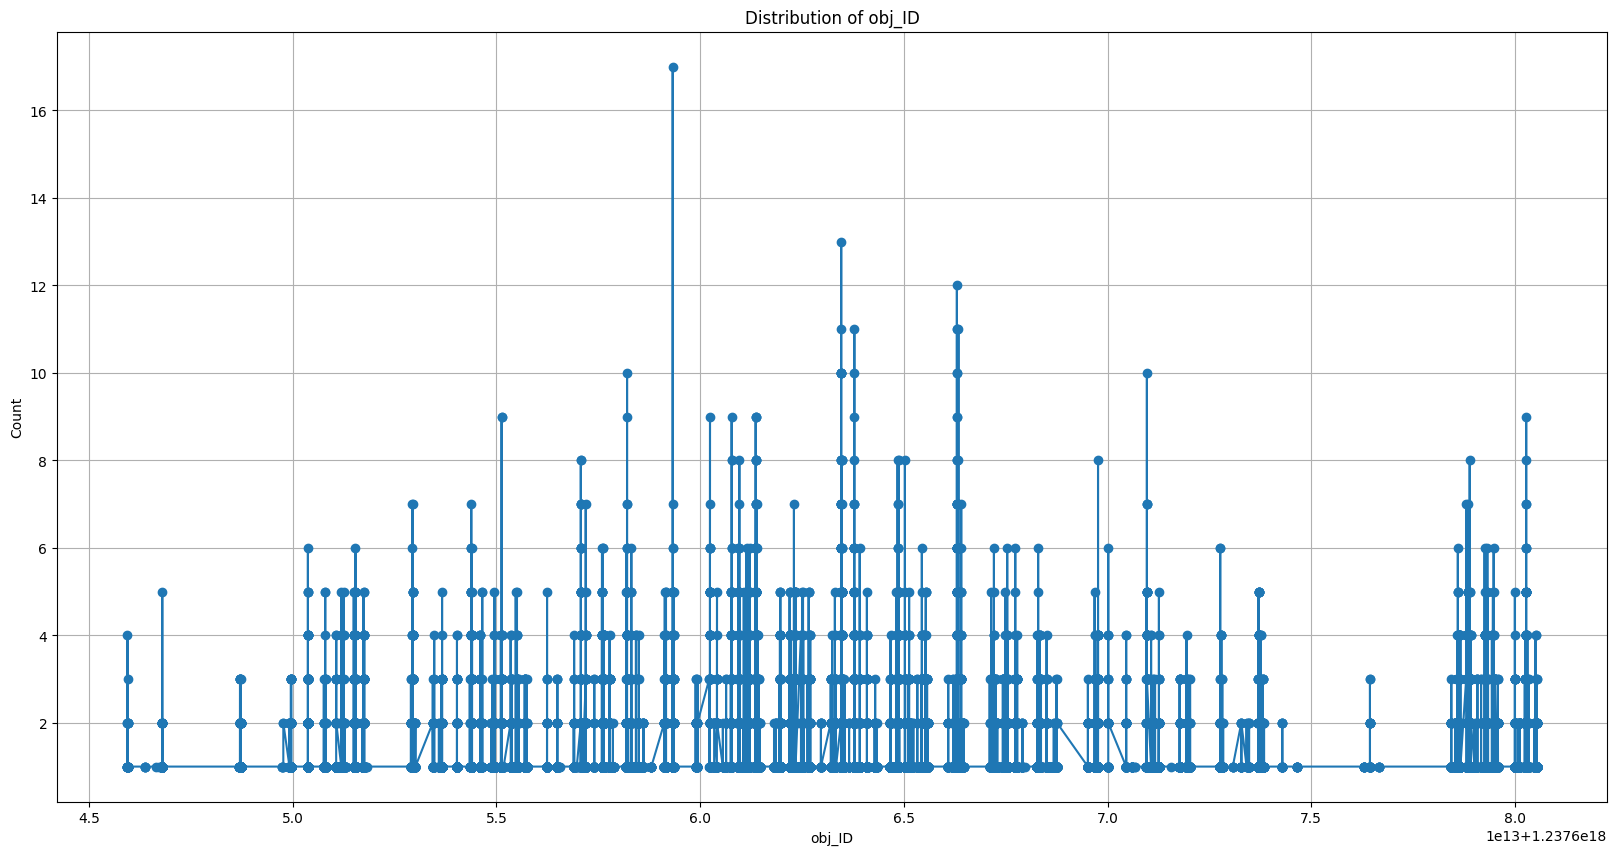

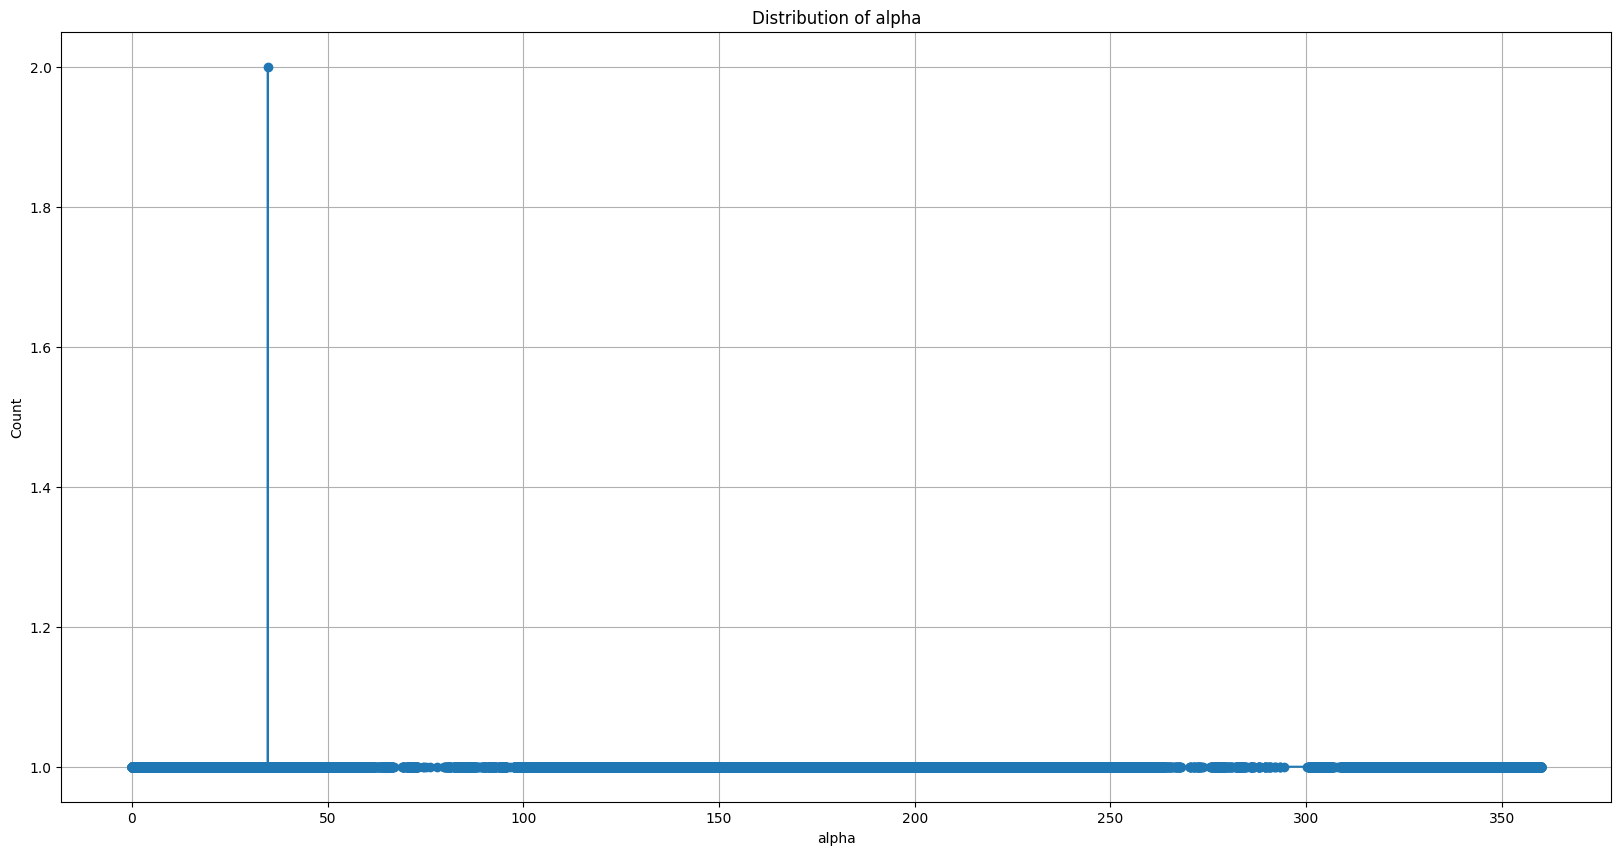

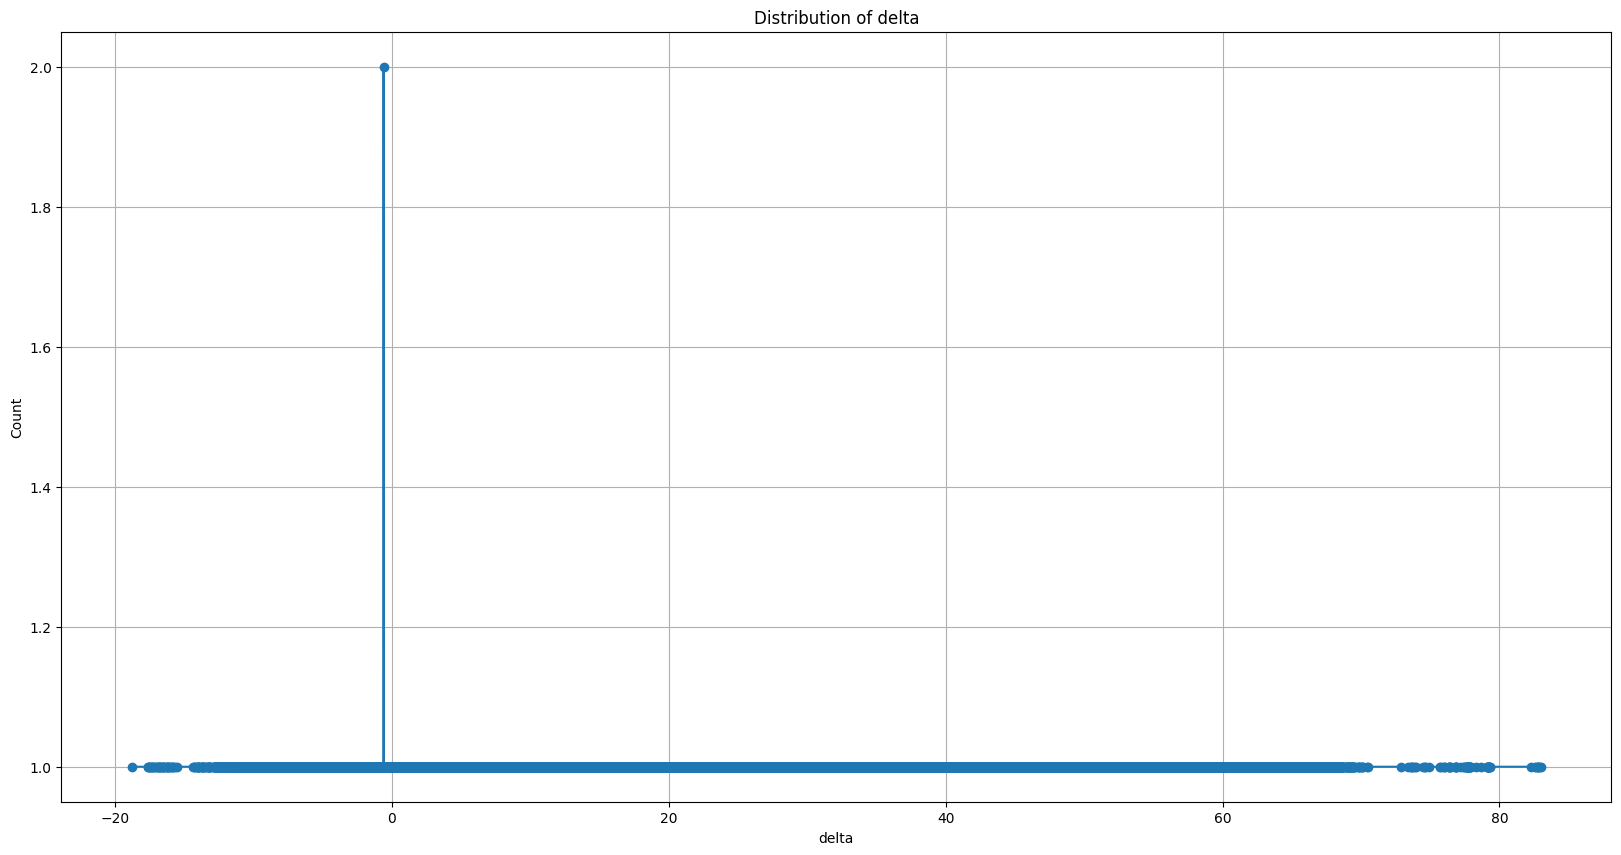

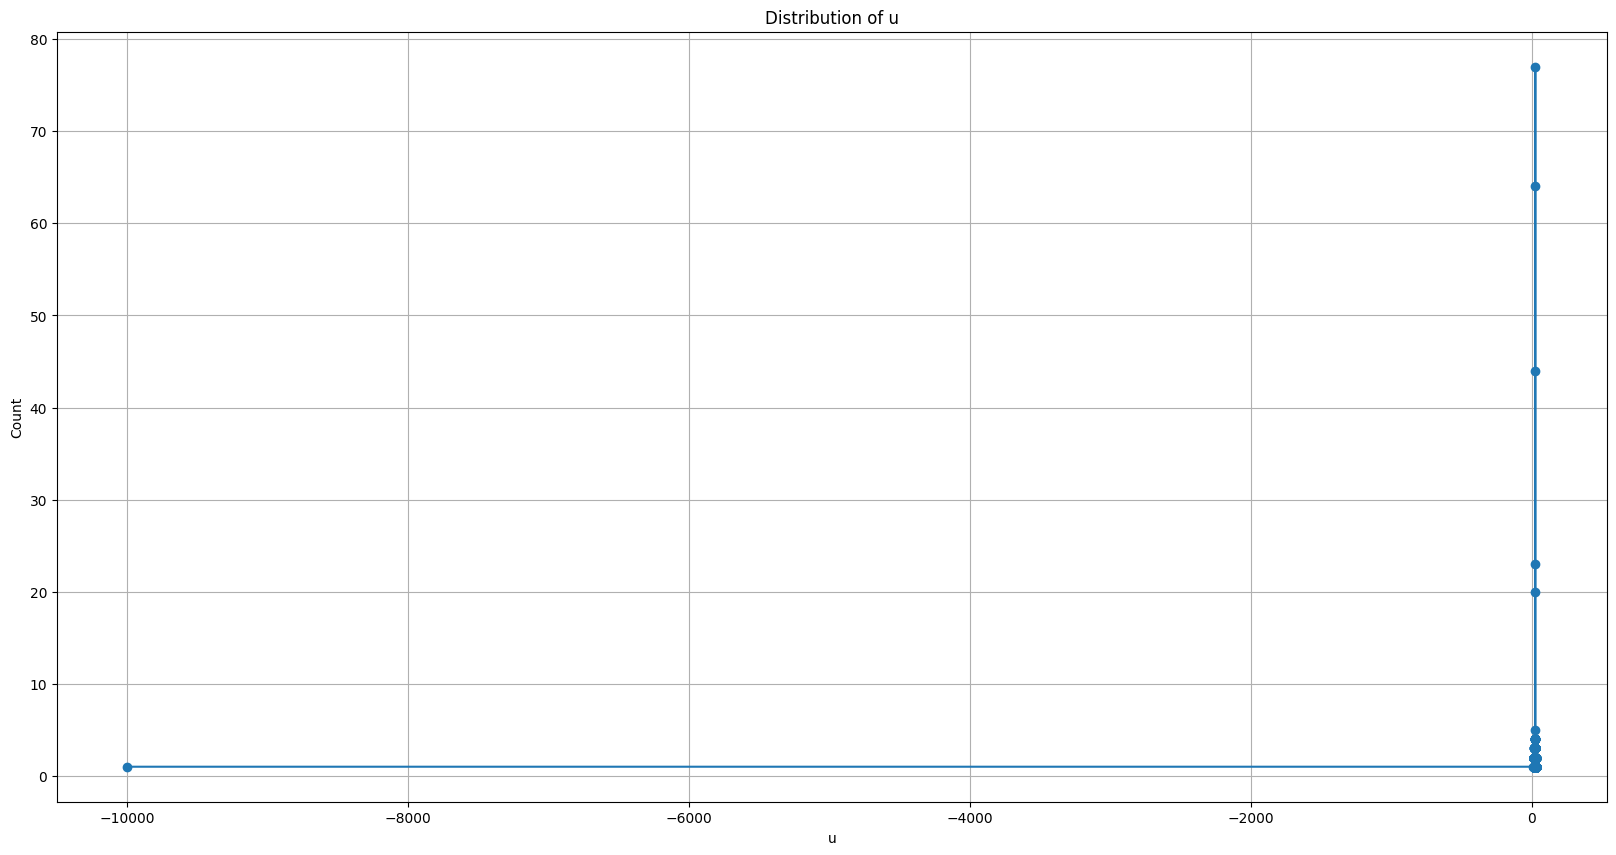

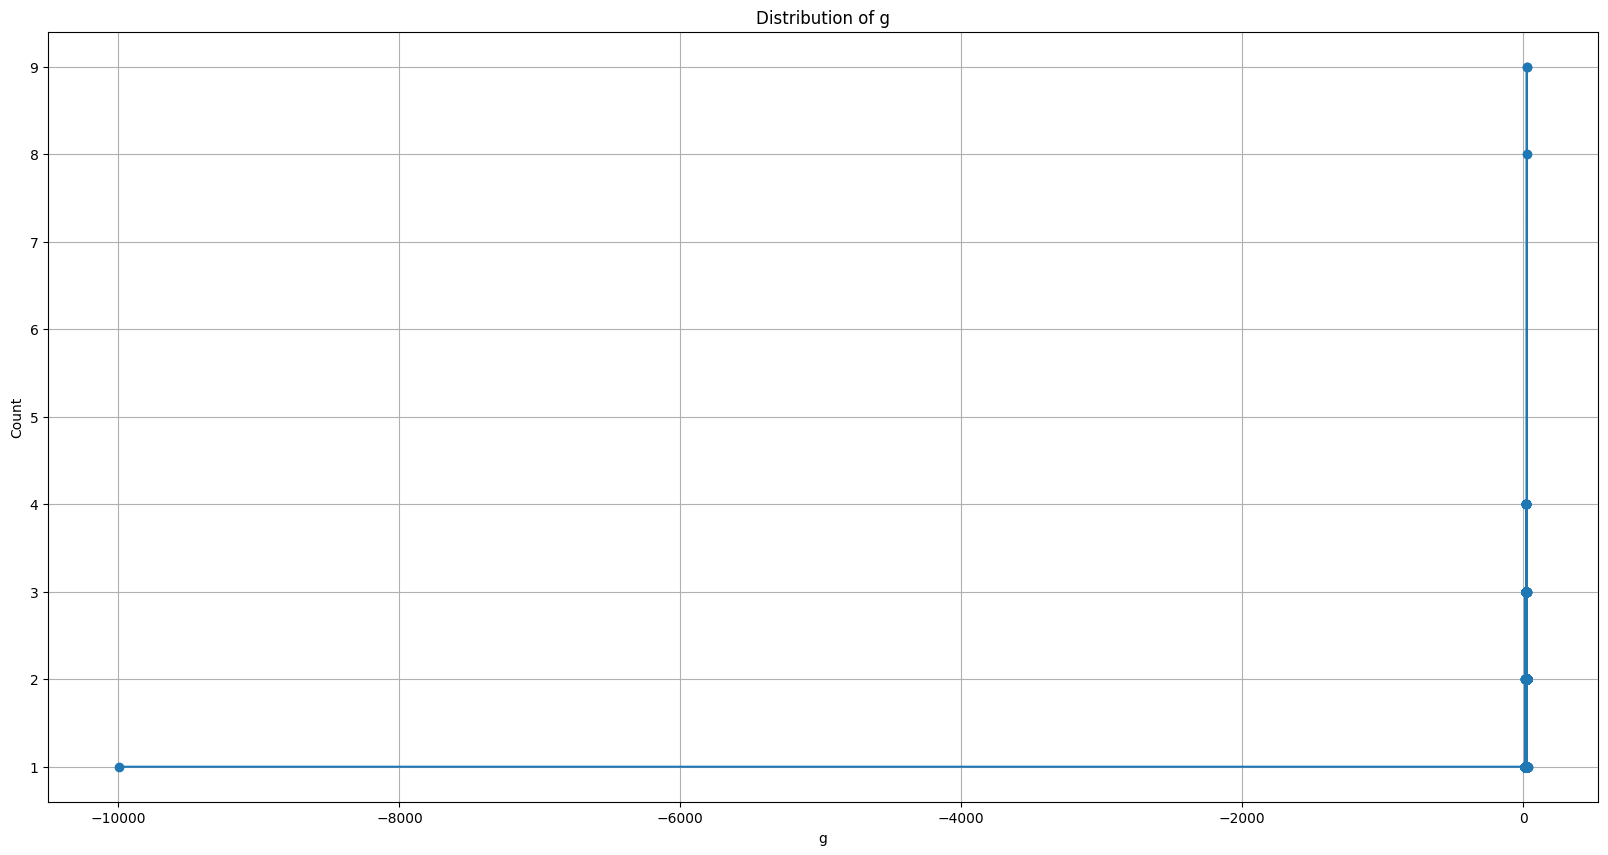

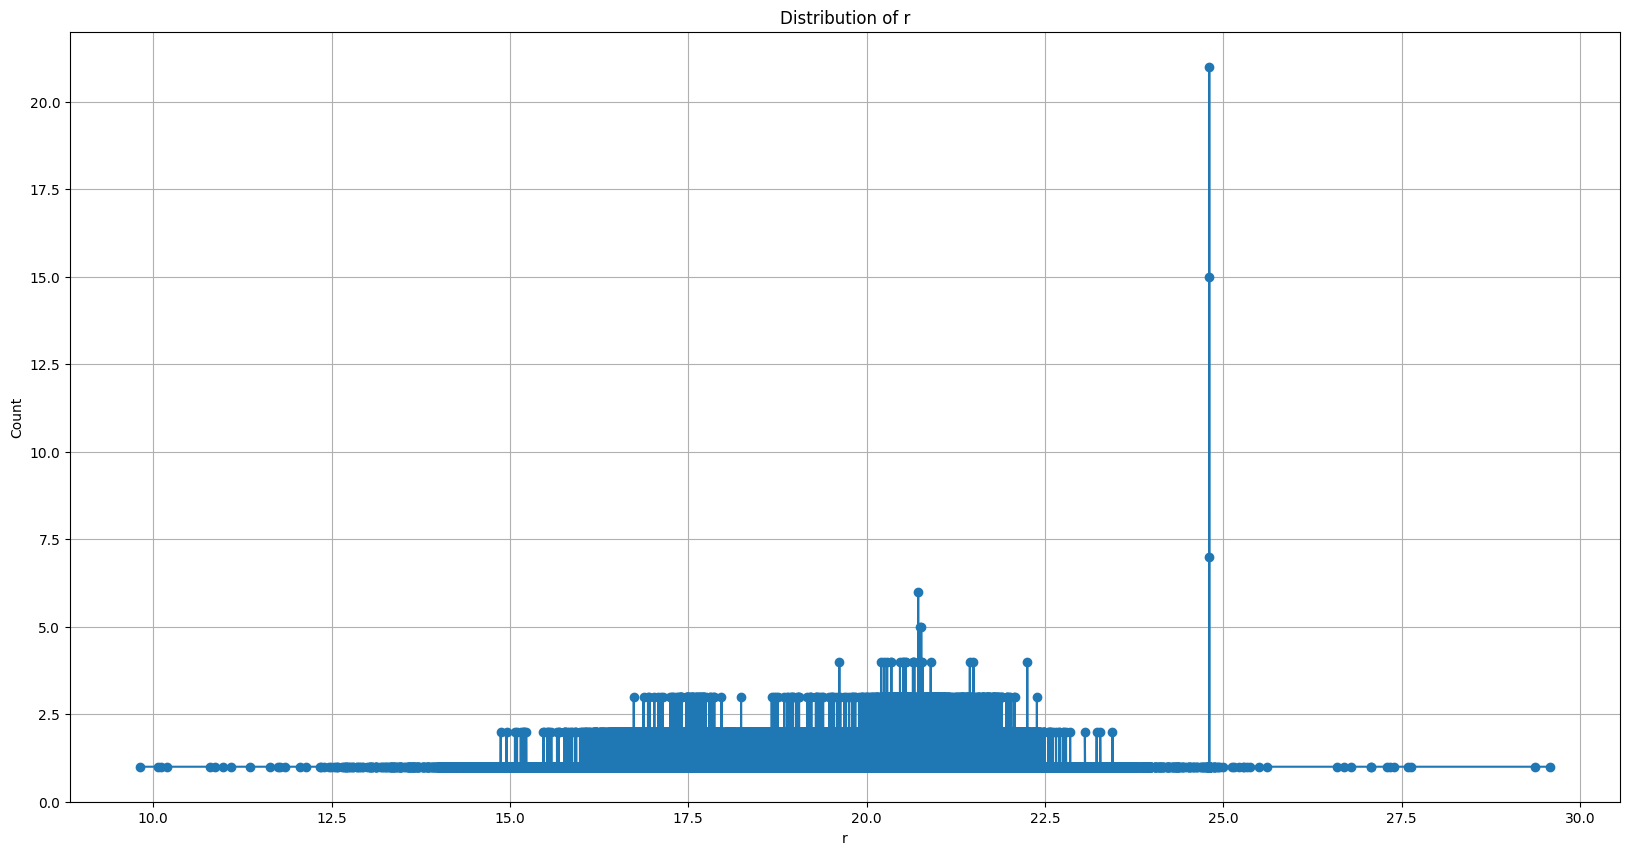

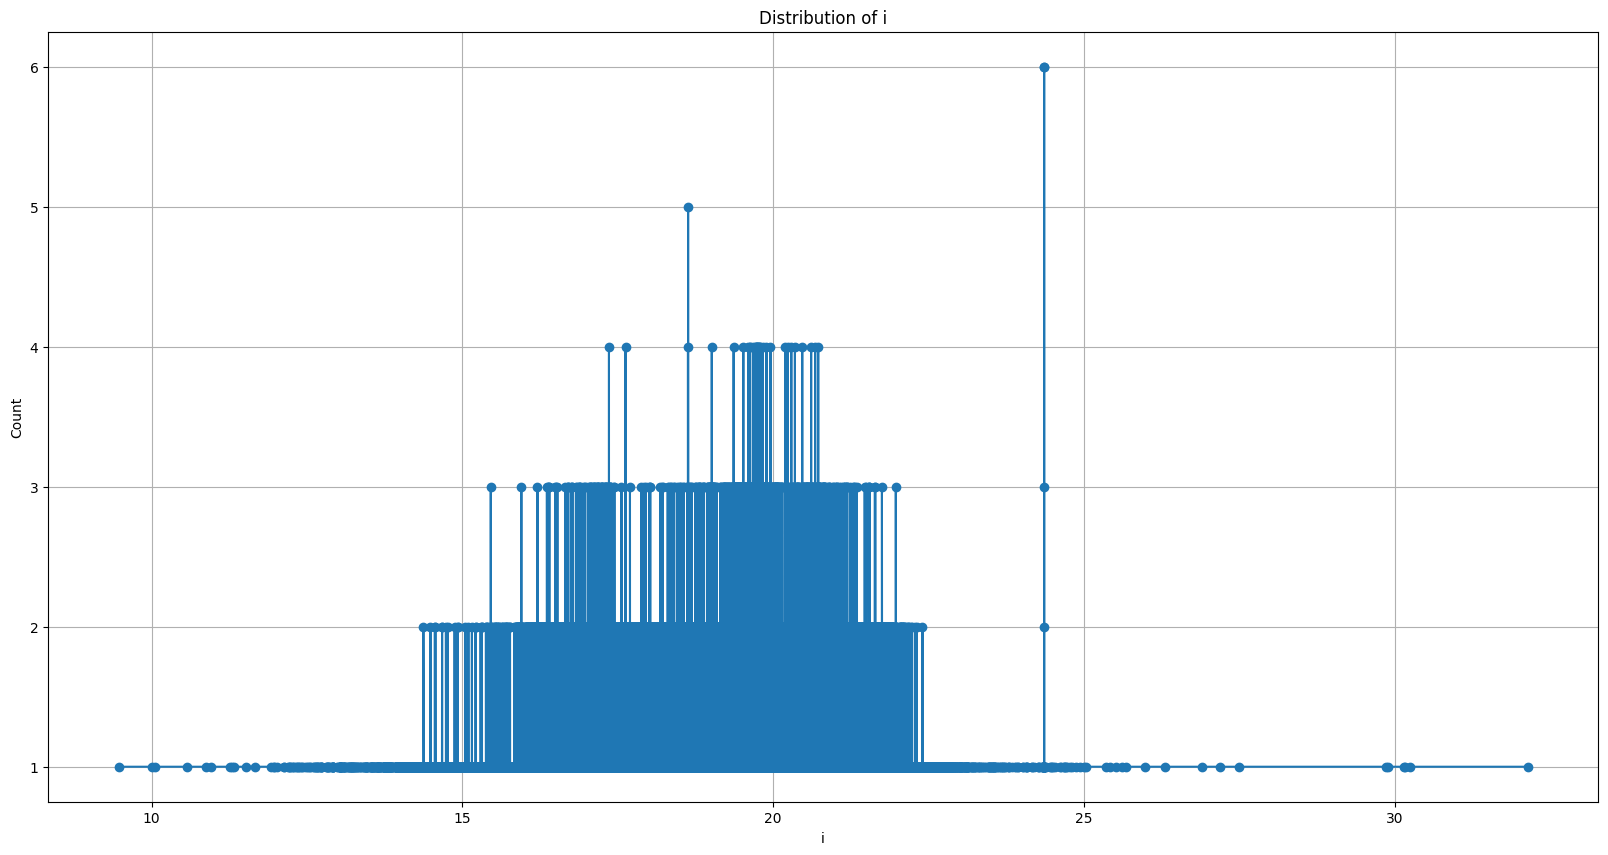

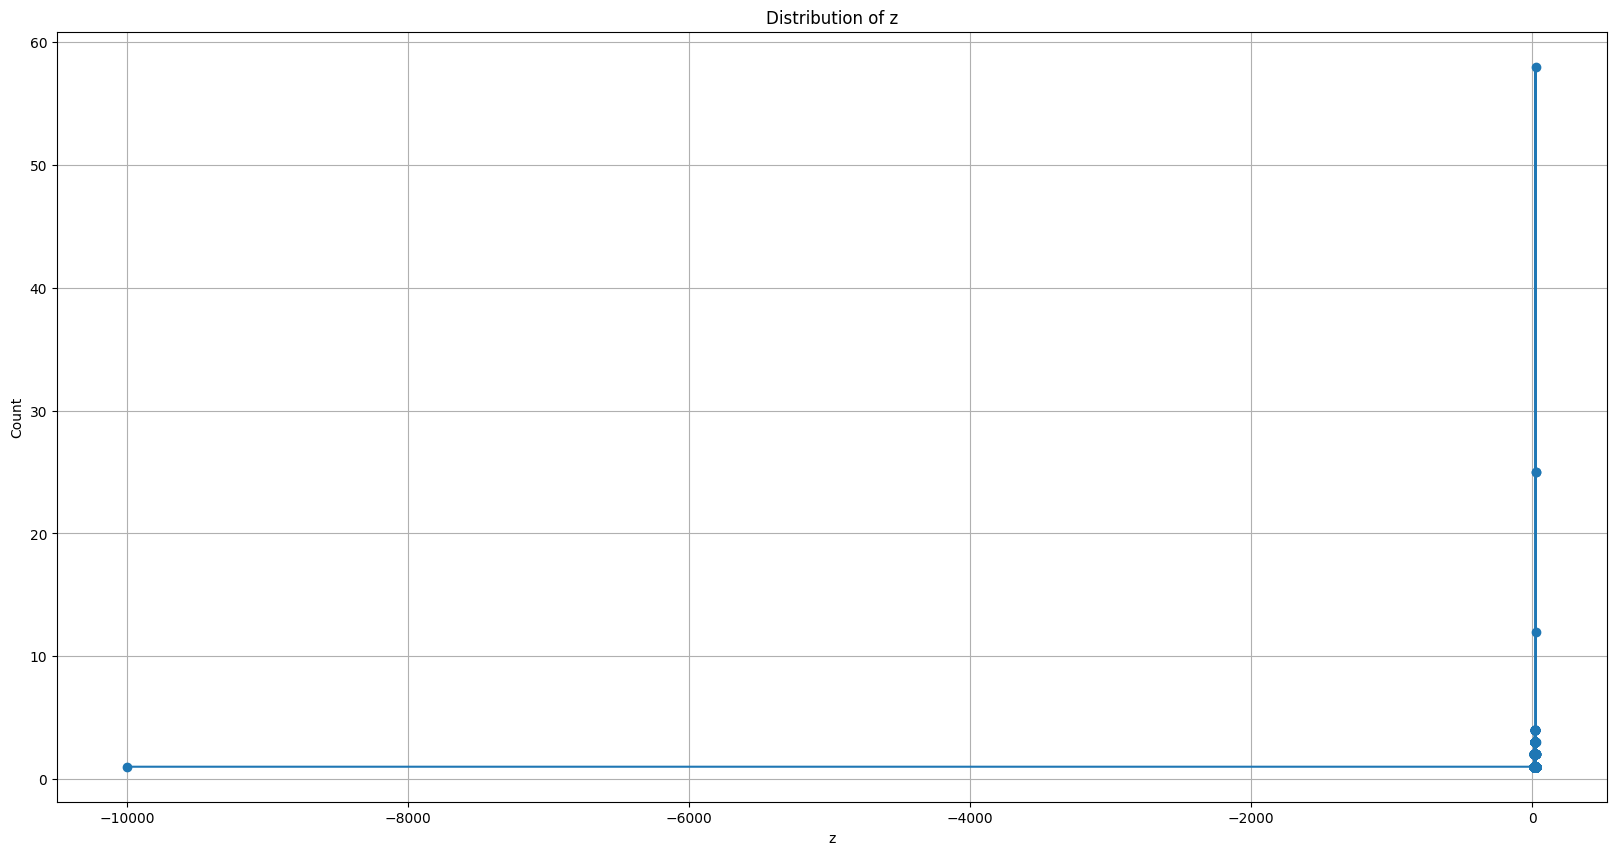

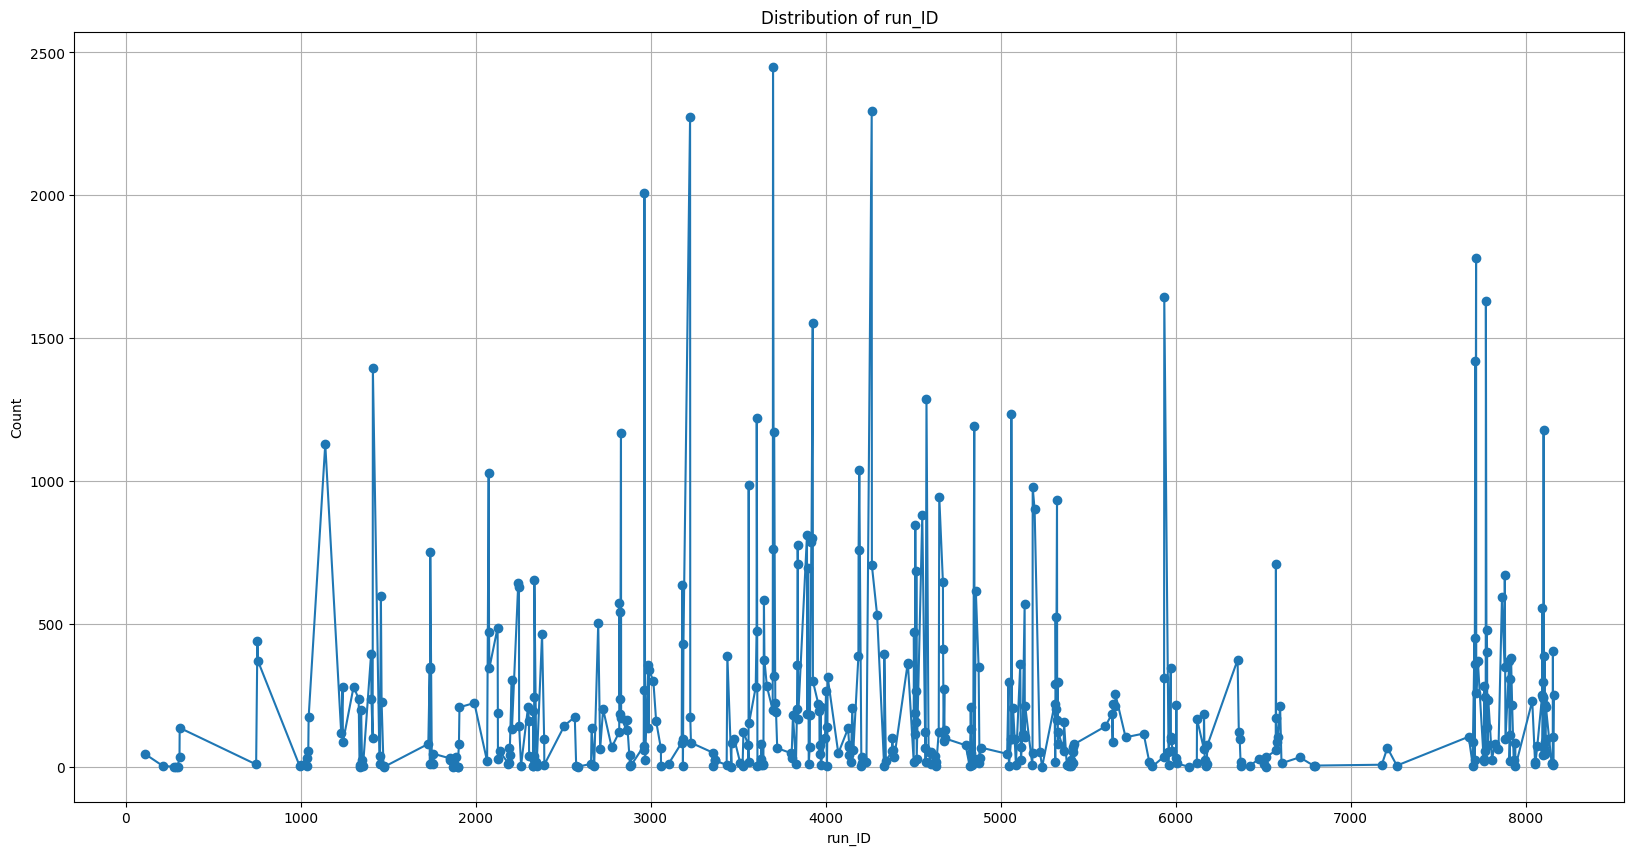

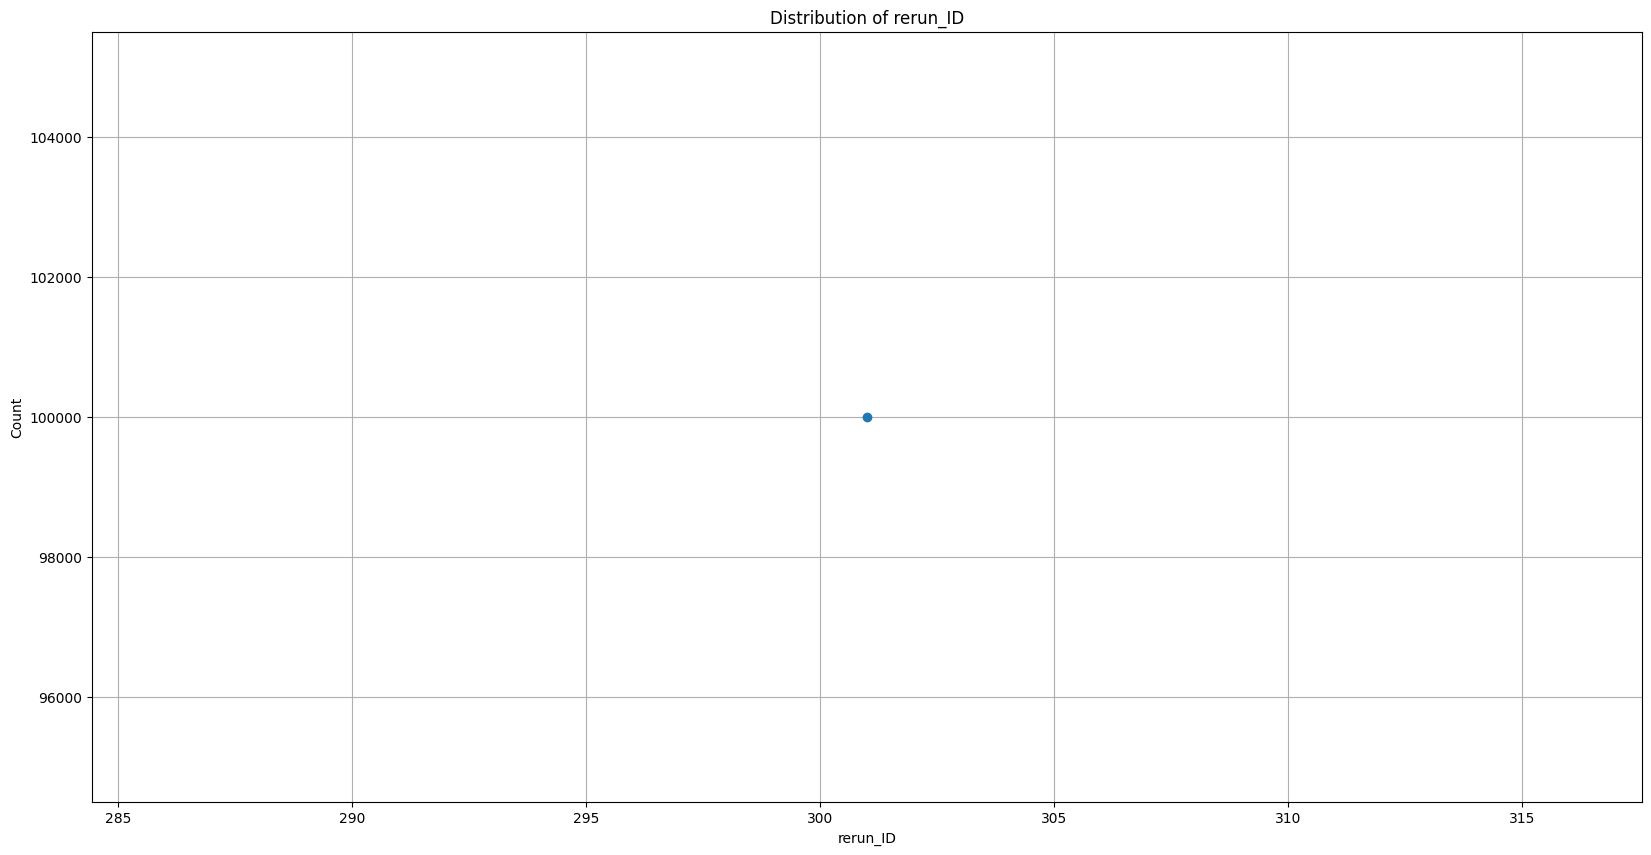

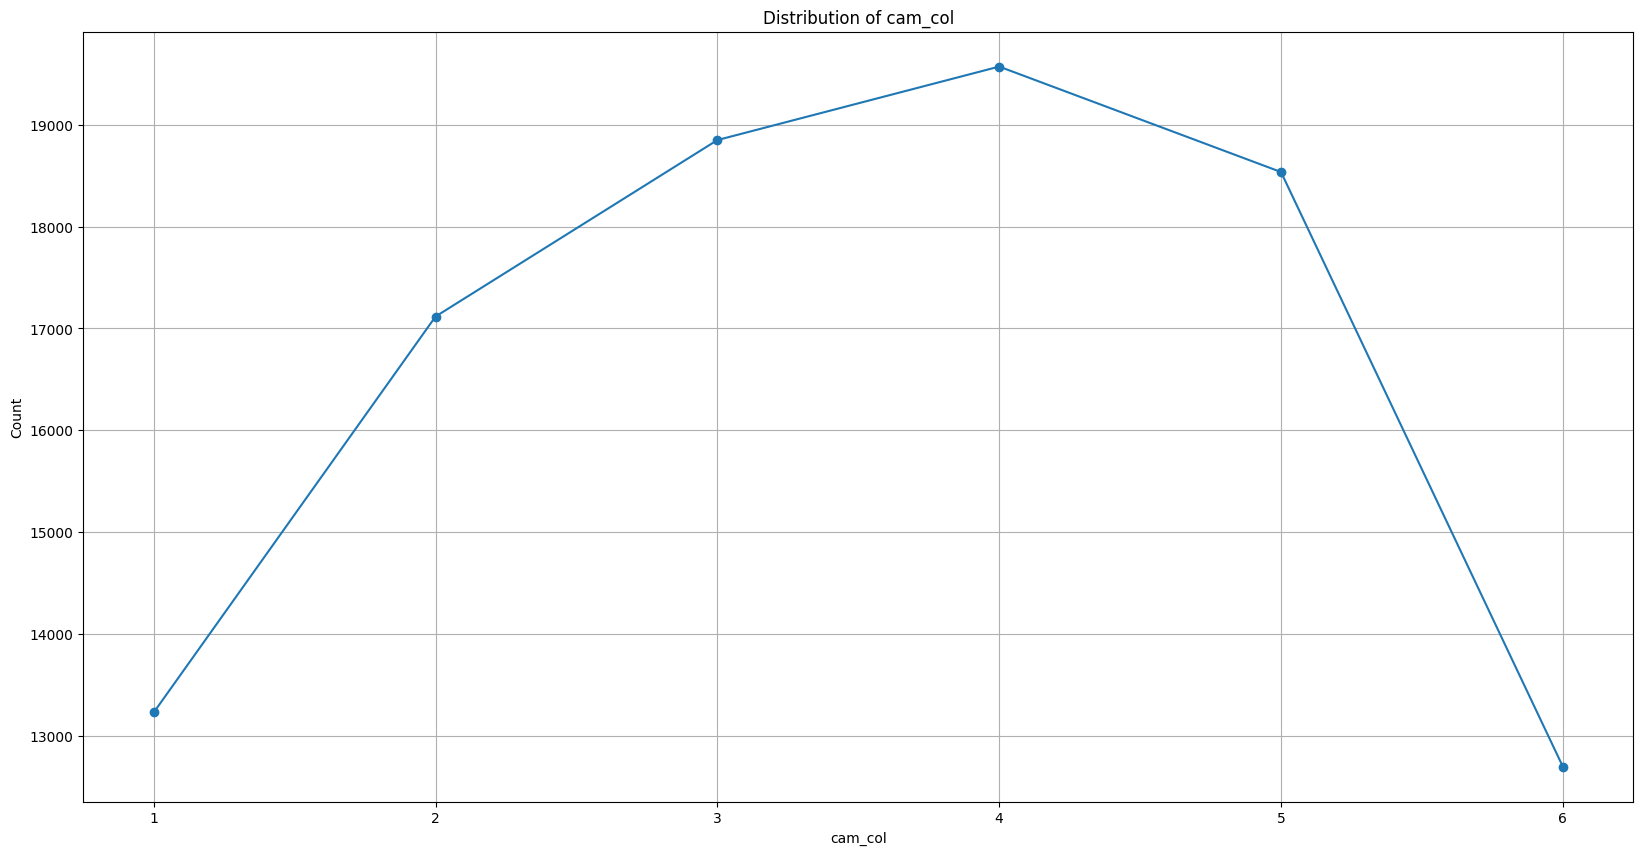

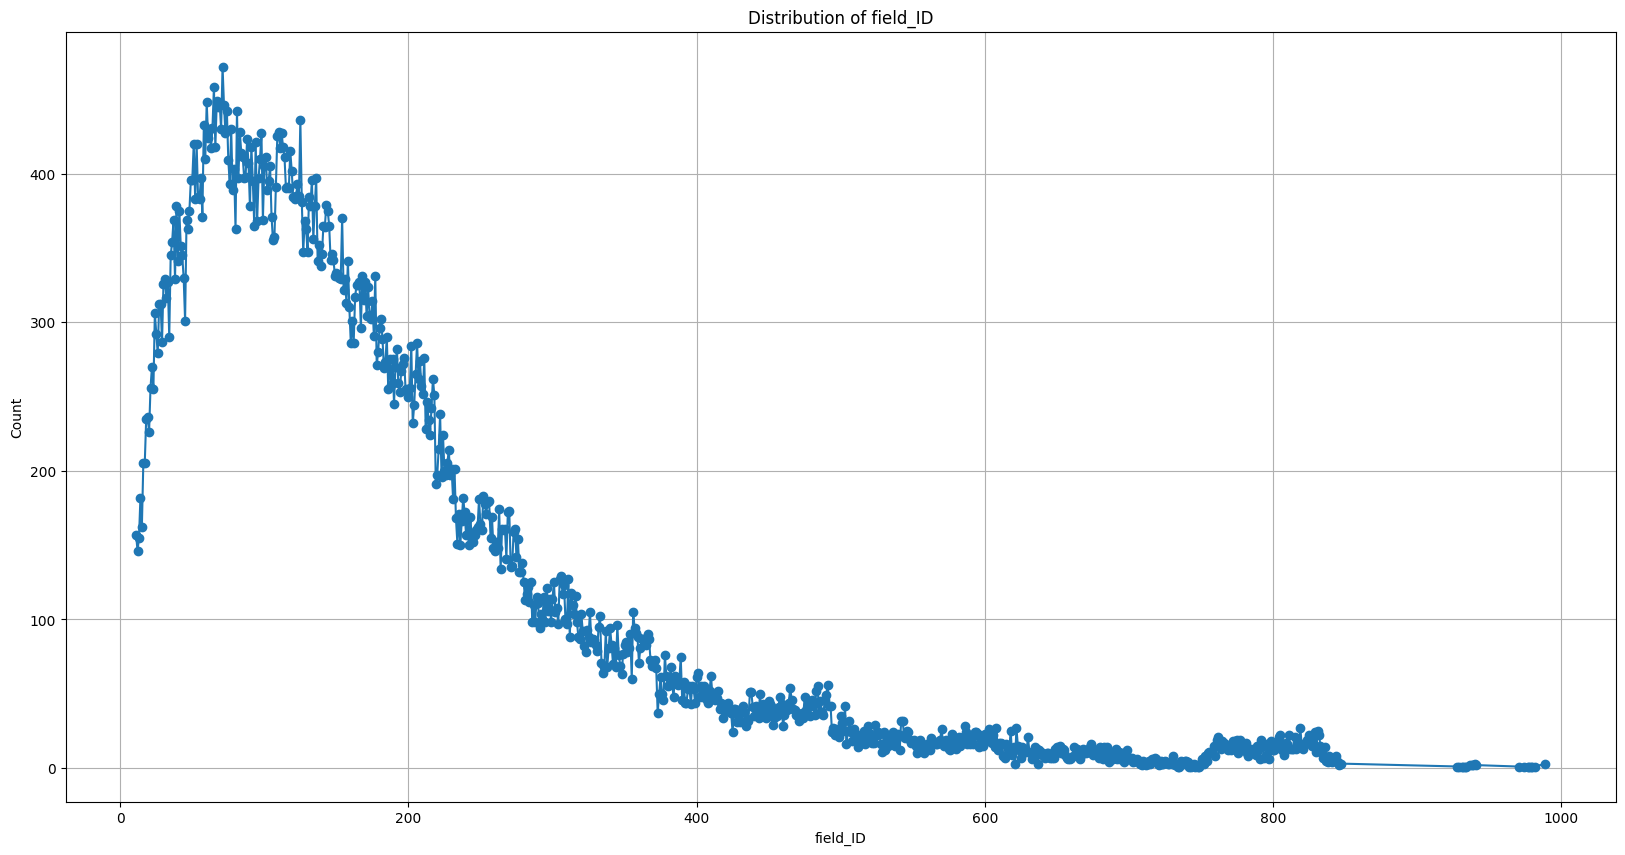

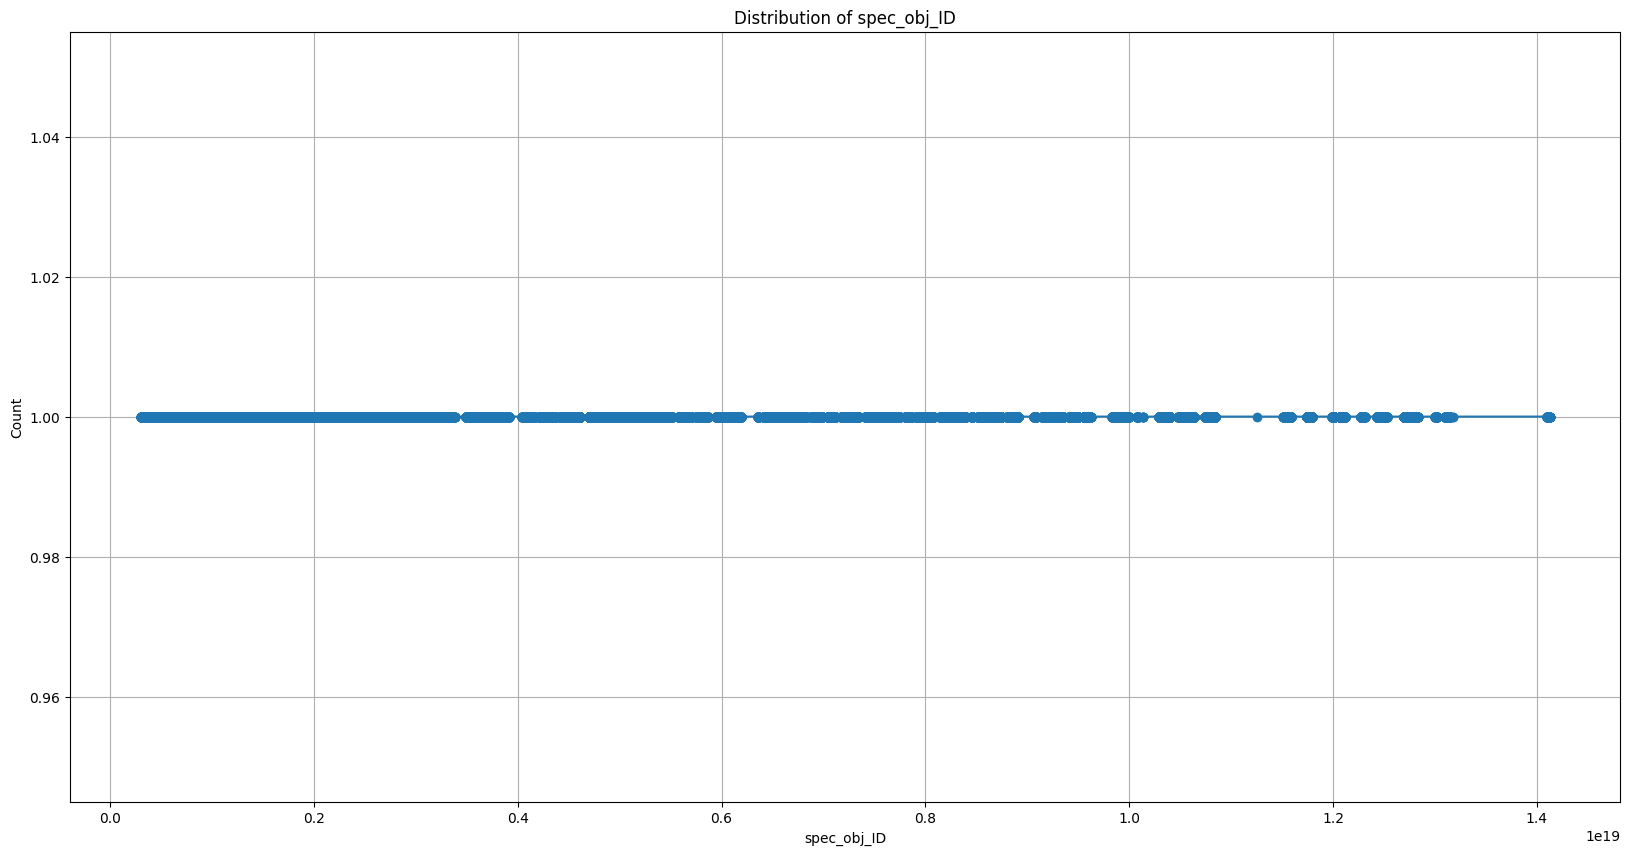

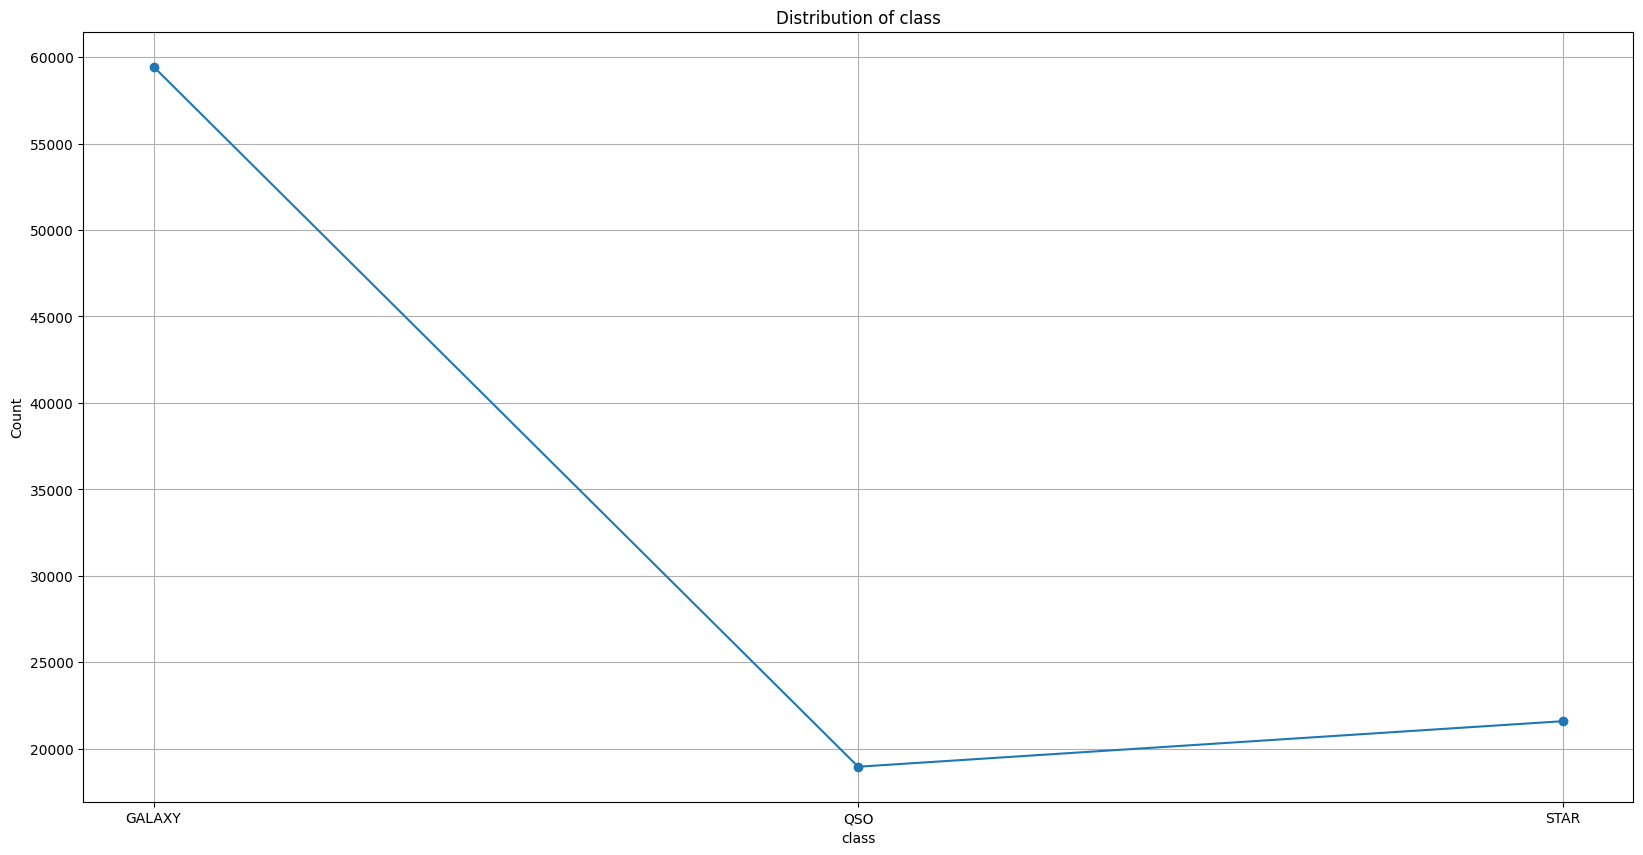

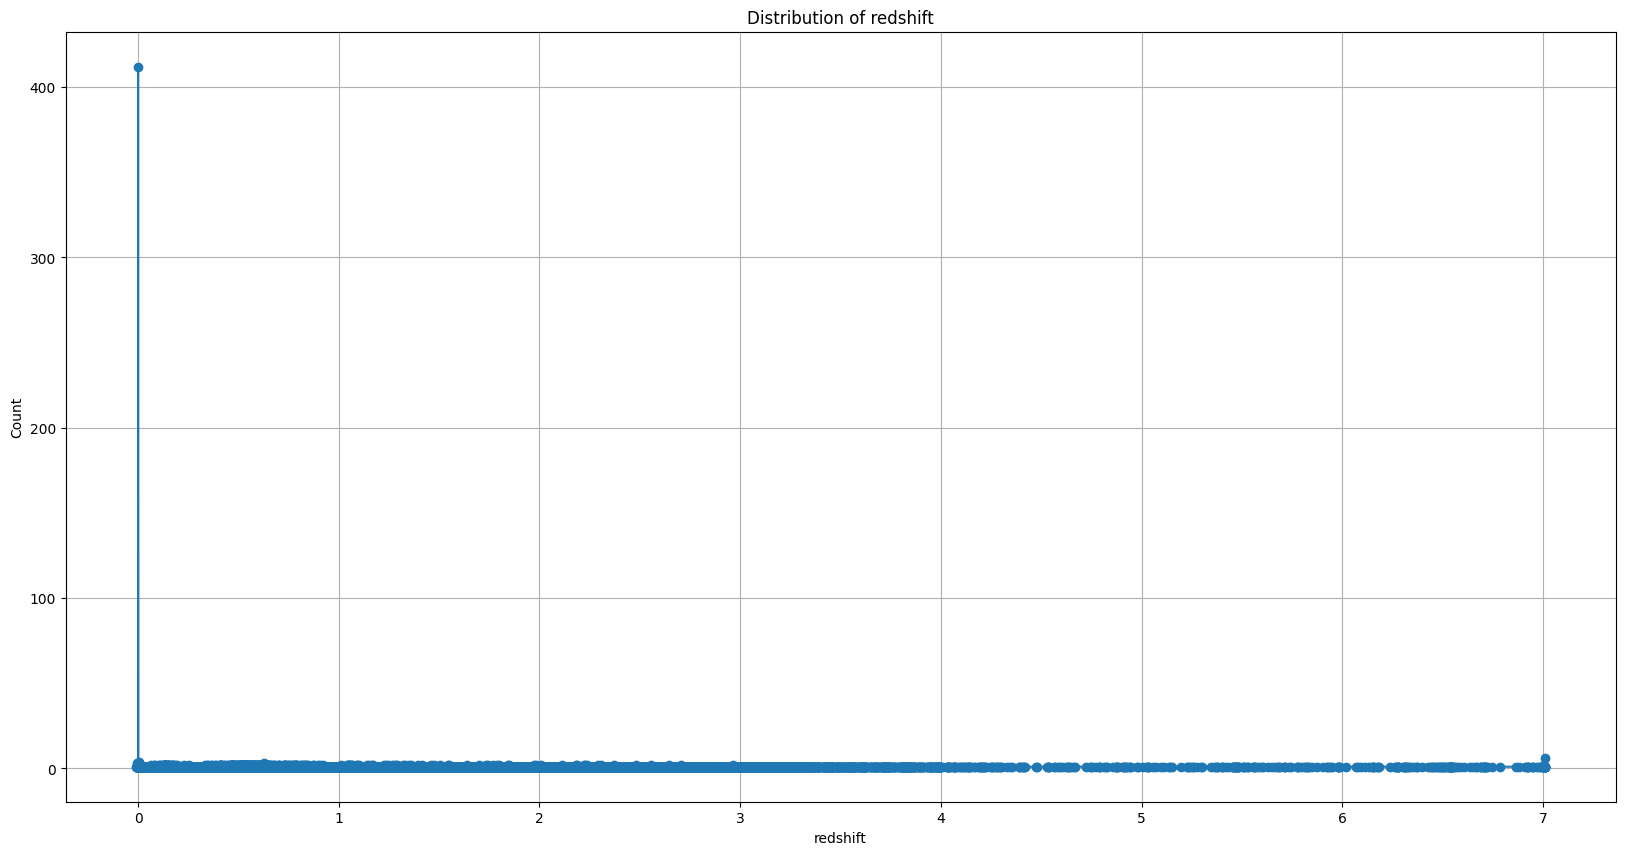

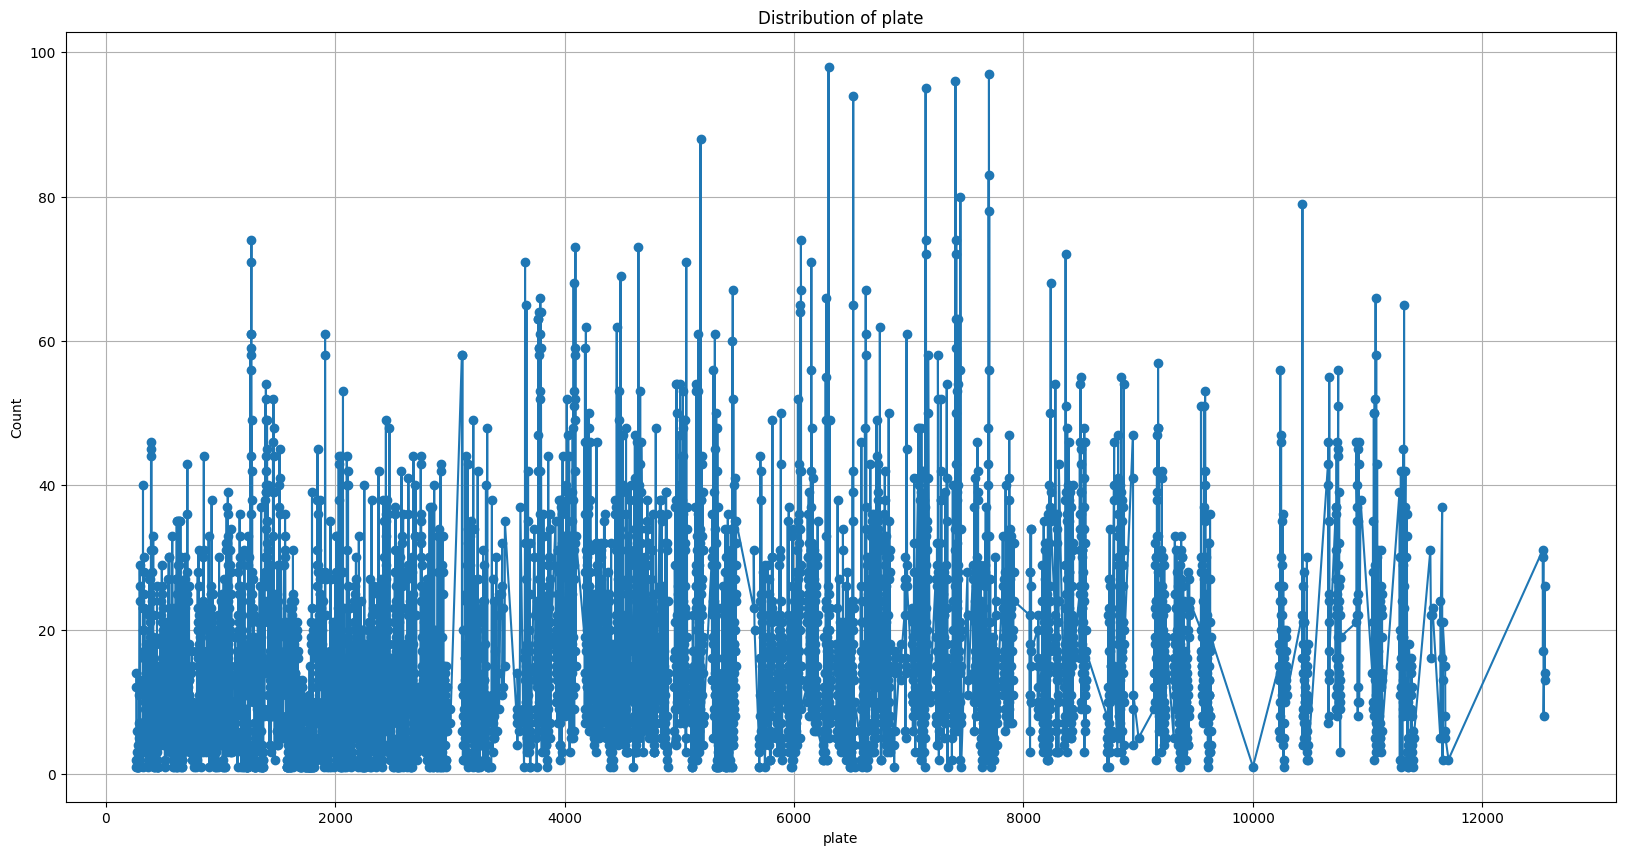

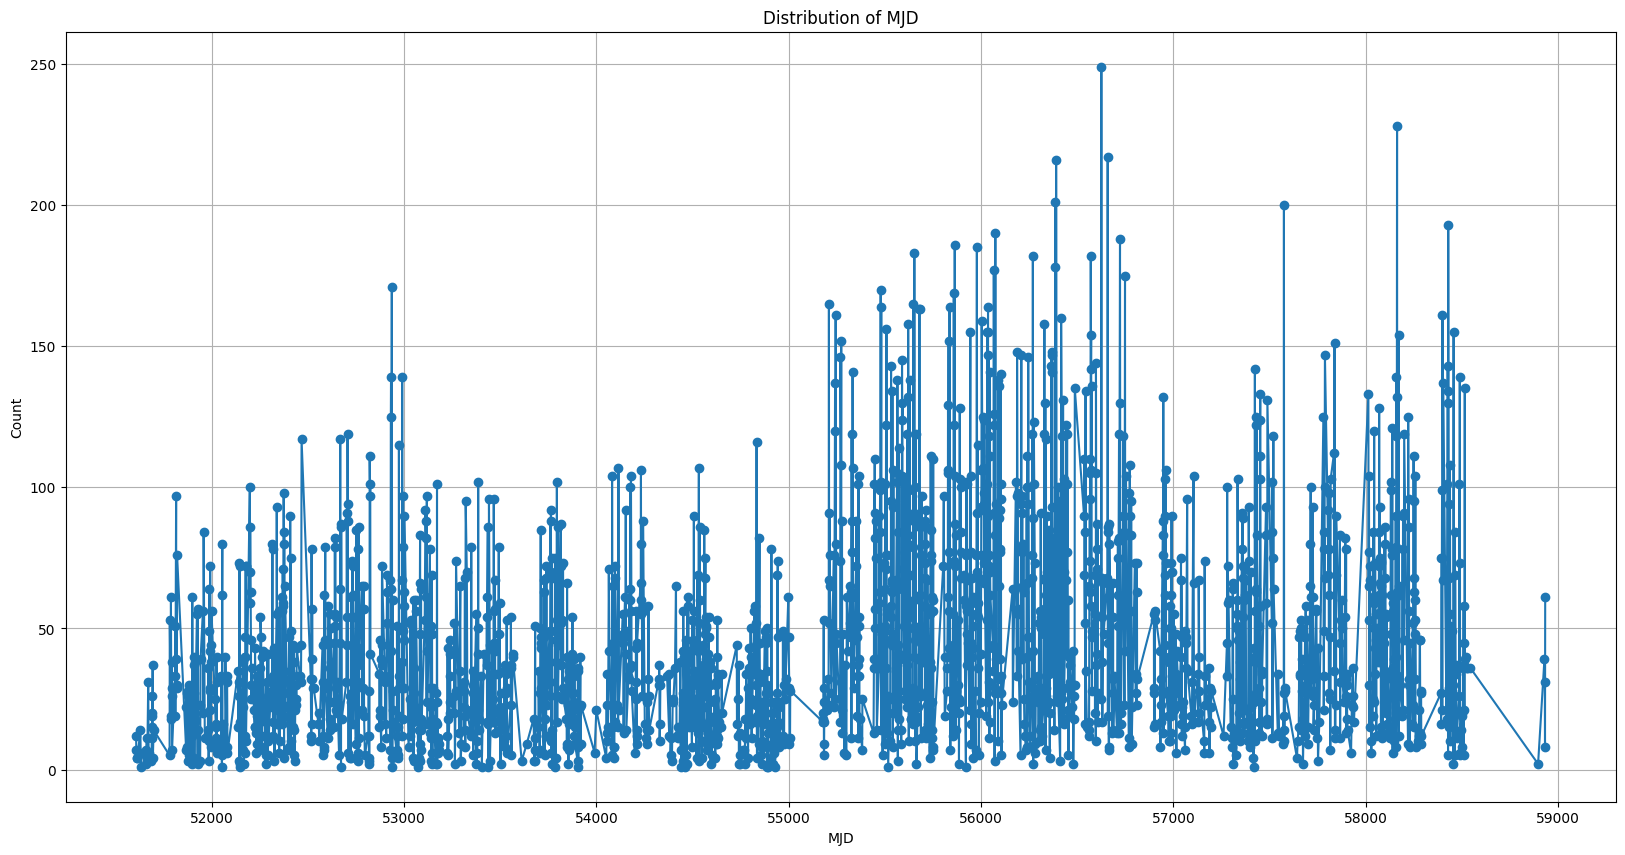

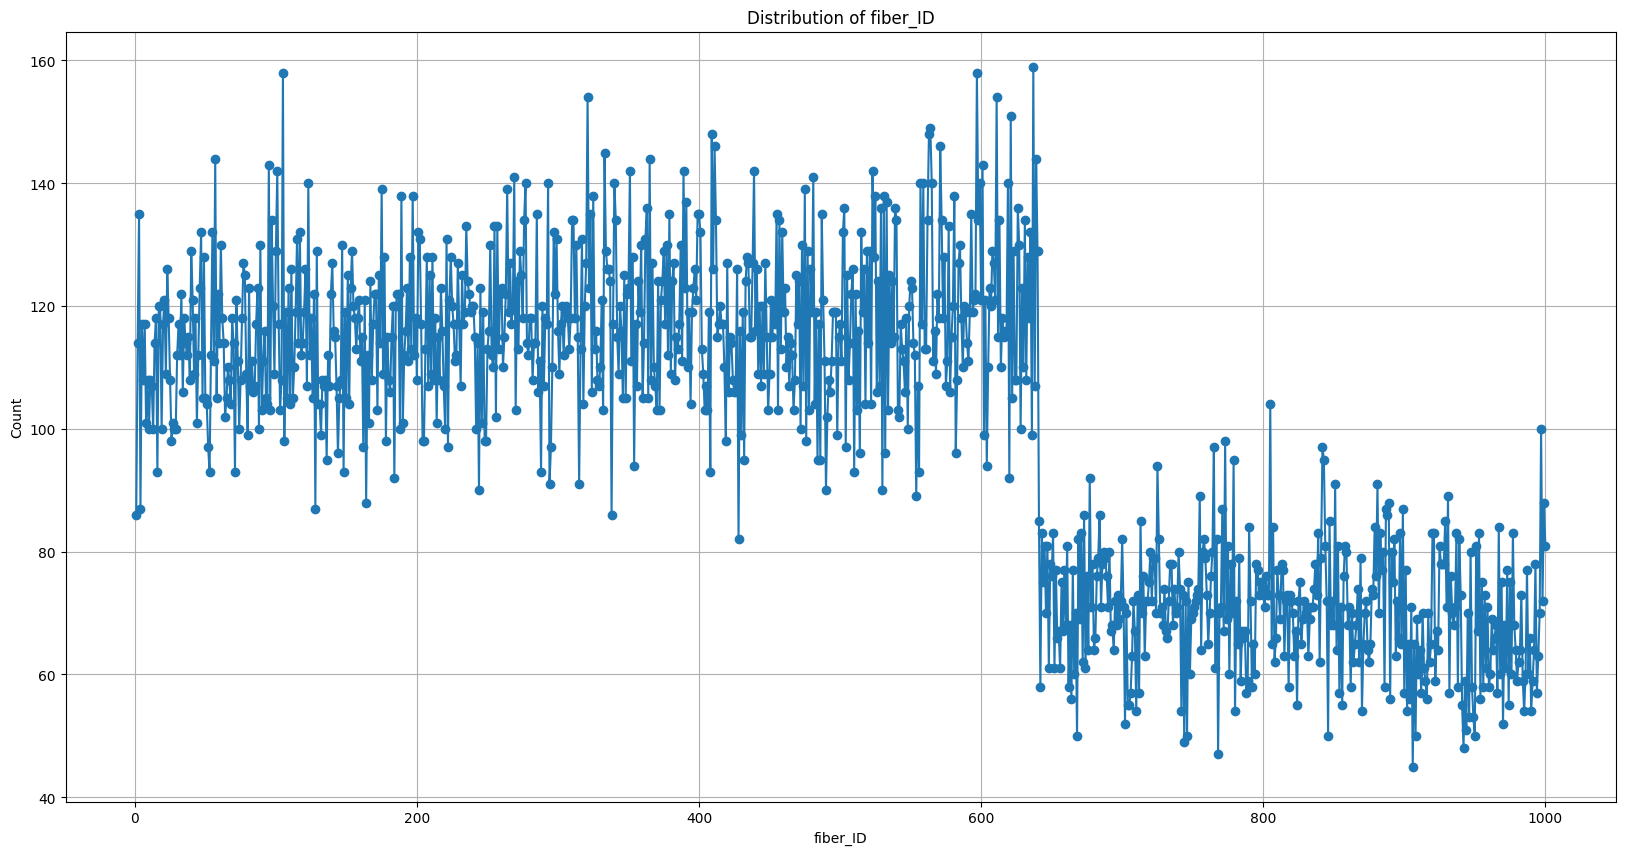

In [ ]:
for column_name in dataset.columns: # mengiterasi melalui setiap nama kolom dalam DataFrame dataset
    plt.figure(figsize=(20, 10)) #membuat sebuah gambar (figure) baru dengan ukuran 8x6 inci sebelum membuat plot untuk setiap kolom.
    plt.plot(dataset[column_name].value_counts().sort_index().index, dataset[column_name].value_counts().sort_index().values, marker='o', linestyle='-') #membuat plot garis untuk distribusi nilai dalam setiap kolom.
    plt.xlabel(column_name) #label sumbu x adalah column_name.
    plt.ylabel('Count') # label sumbu y dengan teks "Count"
    plt.title(f'Distribution of {column_name}') #Judul Gambar
    plt.grid(True) #menampilkan garis-garis grid pada plot
    plt.show() #menampilkan plot yang telah dibuat

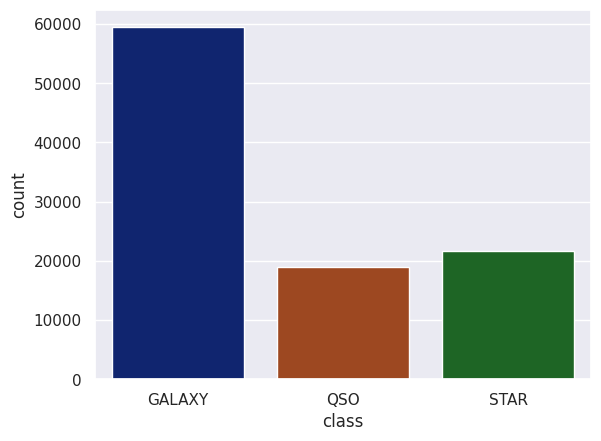

In [ ]:
#menggunakan pustaka Seaborn (sns) untuk membuat plot bar yang menunjukkan jumlah kemunculan setiap nilai unik dalam kolom 'class'
sns.set(style='darkgrid', palette='dark') #mengatur gaya (style) dan palet (palette) untuk plot yang akan dibuat
sns.countplot(x = dataset['class']) #menunjukkan bahwa sumbu x akan berisi nilai dari kolom 'class' dalam DataFrame.
plt.show()

<ipython-input-14-cf87281f19c9>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dataset.corr() #menghitung matriks korelasi antar kolom dalam DataFrame dataset.


<Axes: >

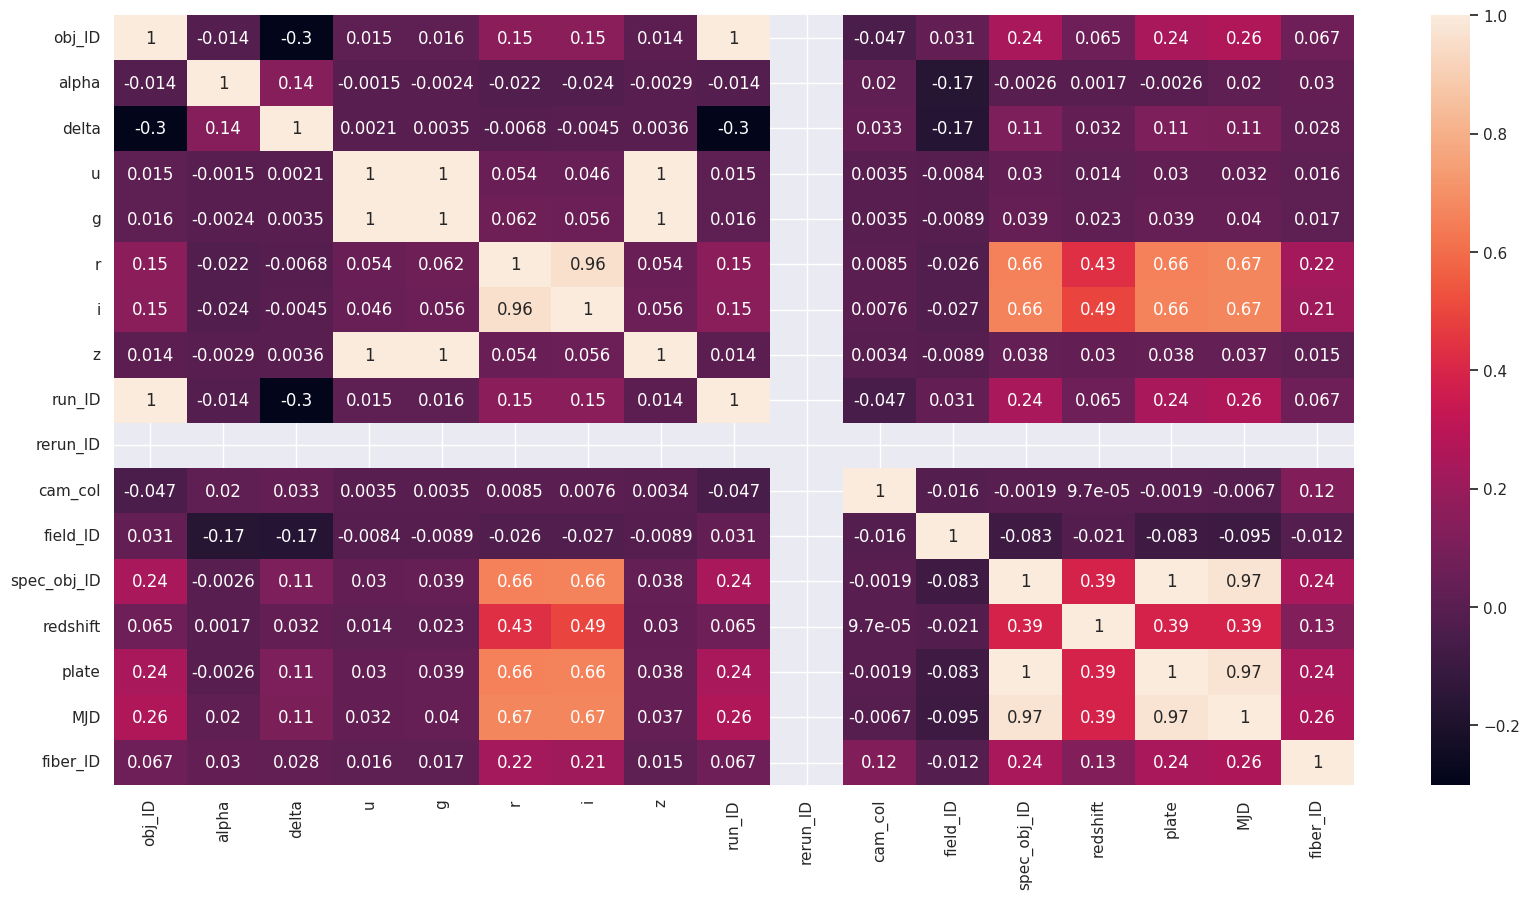

In [ ]:
#menggunakan Matplotlib dan Seaborn untuk membuat heatmap
plt.figure(figsize=(20,10)) #membuat gambar (figure) baru dengan ukuran 15x10 inci sebelum membuat heatmap.
corr = dataset.corr() #menghitung matriks korelasi antar kolom dalam DataFrame dataset.
sns.heatmap(corr,annot=True) #fungsi heatmap dari Seaborn untuk membuat heatmap korelasi. corr adalah matriks korelasi yang dihitung sebelumnya, dan annot=True menambahkan anotasi (nilai korelasi) di dalam sel heatmap.

In [ ]:
dataset['class']=dataset['class'].map({'GALAXY':0,'STAR':1,'QSO':2}) #nilai-nilai dalam kolom 'class' akan diganti sesuai dengan pemetaan yang telah ditentukan

In [ ]:
dataset['class'].value_counts() #untuk melihat distribusi nilai baru dalam kolom

0    59445
1    21594
2    18961
Name: class, dtype: int64

# **PEMILIHAN FITUR**

In [ ]:
X = dataset[['u', 'g', 'r', 'i', 'z', 'redshift', 'plate', 'alpha', 'delta', 'fiber_ID']] # membuat DataFrame baru X yang berisi subset dari kolom-kolom 'u', 'g', 'r', 'i', 'z', 'redshift', 'plate', 'alpha', 'delta', 'fiber_ID'
X

,u,g,r,i,z,redshift,plate,alpha,delta,fiber_ID
0,23.87882,22.27530,20.39501,19.16573,18.79371,0.634794,5812,135.689107,32.494632,171
1,24.77759,22.83188,22.58444,21.16812,21.61427,0.779136,10445,144.826101,31.274185,427
2,25.26307,22.66389,20.60976,19.34857,18.94827,0.644195,4576,142.188790,35.582444,299
3,22.13682,23.77656,21.61162,20.50454,19.25010,0.932346,9149,338.741038,-0.402828,775
4,19.43718,17.58028,16.49747,15.97711,15.54461,0.116123,6121,345.282593,21.183866,842
...,...,...,...,...,...,...,...,...,...,...
99995,22.16759,22.97586,21.90404,21.30548,20.73569,0.000000,9374,39.620709,-2.594074,438
99996,22.69118,22.38628,20.45003,19.75759,19.41526,0.404895,7626,29.493819,19.798874,866
99997,21.16916,19.26997,18.20428,17.69034,17.35221,0.143366,2764,224.587407,15.700707,74
99998,25.35039,21.63757,19.91386,19.07254,18.62482,0.455040,6751,212.268621,46.660365,470


In [ ]:
y = dataset['class'] #membuat variabel y yang berisi kolom 'class' dari DataFrame dataset.
y

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: class, Length: 100000, dtype: int64

# **RESAMPLE**

In [ ]:
#menggunakan metode SMOTE (Synthetic Minority Over-sampling Technique) untuk menangani ketidakseimbangan kelas pada dataset. Berikut adalah penjelasan singkat untuk setiap baris kode
sm = SMOTE(random_state = 30, k_neighbors = 5) #parameter random_state dan k_neighbors. random_state digunakan untuk mengatur seed agar hasilnya dapat direproduksi, dan k_neighbors mengatur jumlah tetangga
X_res, y_res = sm.fit_resample(X, y) # metode fit_resample dari SMOTE untuk menangani ketidakseimbangan kelas. X_res (matriks fitur) dan y_res (target atau label)
y.value_counts() #Menampilkan jumlah kemunculan setiap nilai unik dalam variabel target y sebelum dilakukan oversampling.

0    59445
1    21594
2    18961
Name: class, dtype: int64

In [ ]:
X_res.value_counts() #untuk menghitung jumlah kemunculan setiap nilai unik dalam variabel target y_res setelah dilakukan oversampling menggunakan metode SMOTE

u             g             r          i          z             redshift   plate  alpha       delta       fiber_ID
-9999.000000  -9999.000000  18.165600  18.016750  -9999.000000   0.000089  3314   224.006526  -0.624304   162         1
 22.595620     21.974860    20.322500  19.487170   18.973790     0.504914  6281   8.002314     25.863025  931         1
 22.595375     21.395939    21.312219  21.390474   21.549081     2.474711  6730   219.405320   49.143232  805         1
 22.595421     20.435579    19.739538  19.397327   19.232996    -0.000302  4996   257.069662   33.073884  501         1
 22.595430     22.626910    21.897810  21.201320   21.233070     0.727058  9422   35.592005    4.465117   970         1
                                                                                                                     ..
 20.840904     20.452828    20.236548  20.306165   20.461230     1.630083  6681   186.096096   52.449132  121         1
 20.840920     18.838740    17.704290  17.236

# **SPLITTING DATASET**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state = 30) #untuk membagi dataset yang sudah di-"oversample" (X_res, y_res) menjadi set pelatihan (train) dan set pengujian (test).
'''
X_train: Matriks fitur untuk set pelatihan.
X_test: Matriks fitur untuk set pengujian.
y_train: Variabel target untuk set pelatihan.
y_test: Variabel target untuk set pengujian.
'''

'\nX_train: Matriks fitur untuk set pelatihan.\nX_test: Matriks fitur untuk set pengujian.\ny_train: Variabel target untuk set pelatihan.\ny_test: Variabel target untuk set pengujian.\n'

In [ ]:
print("X_train:")
print(X_train.head())

X_train:
                u          g          r          i          z  redshift  \
5158    17.946530  16.840150  16.361310  16.147940  16.021550 -0.000076   
30170   19.212660  18.145990  17.653520  17.250640  17.146390  0.107481   
134260  18.372446  16.838816  16.253311  16.045361  15.952016 -0.000183   
31966   18.068240  16.691020  16.126000  15.811590  15.670920  0.025822   
155948  21.112501  20.985617  20.986410  20.965933  21.347169  1.554162   

        plate       alpha      delta  fiber_ID  
5158     2682  100.059111  38.280377       336  
30170     844  185.049480   5.367074       591  
134260   1487  355.245397  -0.016276       193  
31966     566  135.510715   3.590435       345  
155948   7574  333.147123  19.335495       984  


In [ ]:
print("y_train:")
print(y_train.head())

y_train:
5158      1
30170     0
134260    1
31966     0
155948    2
Name: class, dtype: int64


# **ALGORITMA KLASIFIKASI**

In [ ]:
score_dataset = pd.DataFrame(columns=['Algorithm', 'Recall score']) #digunakan untuk menyimpan skor recall dari berbagai algoritma klasifikasi yang akan dievaluasi pada dataset

In [ ]:
score_dataset

,Algorithm,Recall score


***Random Forest***

In [ ]:
rf_dataset = pd.DataFrame(columns=['Estimators','Recall score']) #digunakan untuk menyimpan skor recall dari model Random Forest dengan berbagai jumlah estimator

In [ ]:
#melakukan iterasi dari 1 hingga 20, membangun model Random Forest dengan jumlah estimator yang berbeda-beda, dan menyimpan nilai recall score untuk setiap model dalam DataFrame rf_dataset
for i in range(1,21): #loop yang iterasi dari 1 hingga 20, yang akan digunakan sebagai jumlah estimator pada model Random Forest.
    model = RandomForestClassifier(n_estimators = i, random_state = 30)
    model.fit(X_train, y_train)
    y_pred5 = model.predict(X_test)
    rf_dataset = rf_dataset.append({'Estimators':i, 'Recall score':recall_score(y_test, y_pred5, average = 'weighted')}, ignore_index = True) #Menambahkan baris baru ke dalam DataFrame

rf_dataset

<ipython-input-27-2ad9179c9b46>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rf_dataset = rf_dataset.append({'Estimators':i, 'Recall score':recall_score(y_test, y_pred5, average = 'weighted')}, ignore_index = True) #Menambahkan baris baru ke dalam DataFrame
<ipython-input-27-2ad9179c9b46>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rf_dataset = rf_dataset.append({'Estimators':i, 'Recall score':recall_score(y_test, y_pred5, average = 'weighted')}, ignore_index = True) #Menambahkan baris baru ke dalam DataFrame
<ipython-input-27-2ad9179c9b46>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rf_dataset = rf_dataset.append({'Estimators':i, 'Recall score':recall_score(y_test, y_pred5, average = 'weighted')}, ignore_inde

,Estimators,Recall score
0,1.0,0.966984
1,2.0,0.966692
2,3.0,0.978041
3,4.0,0.979230
4,5.0,0.980397
5,6.0,0.980890
6,7.0,0.981518
7,8.0,0.981922
8,9.0,0.981810
9,10.0,0.982124


In [ ]:
rf_dataset = rf_dataset.sort_values(by='Recall score', ascending = False) #Mengurutkan DataFrame rf_dataset berdasarkan kolom 'Recall score' secara menurun (descending).
rf_dataset.head()

,Estimators,Recall score
17,18.0,0.982460
16,17.0,0.982438
19,20.0,0.982325
15,16.0,0.982281
18,19.0,0.982236


In [ ]:
#membuat model Random Forest dengan jumlah estimator sebanyak 18, menggunakan seed acak (random_state) 30, dan kemudian melatih model tersebut dengan set pelatihan (X_train dan y_train).
#Selanjutnya, model digunakan untuk melakukan prediksi pada set pengujian (X_test), dan hasil prediksi disimpan dalam variabel y_pred5
model = RandomForestClassifier(n_estimators = 18, random_state = 30)
model.fit(X_train, y_train)
y_pred5 = model.predict(X_test)

In [ ]:
#menghitung nilai recall score dari prediksi model Random Forest pada set pengujian (X_test dan y_test) dan menyimpan hasilnya dalam variabel rf_score.
#Nilai recall score dihitung dengan menggunakan fungsi recall_score dari pustaka scikit-learn.
rf_score = recall_score(y_test, y_pred5, average = 'weighted')
'''
*) y_test: Variabel target yang sesungguhnya pada set pengujian.
*) y_pred5: Hasil prediksi dari model Random Forest pada set pengujian.
*0 average='weighted': Parameter yang menentukan cara menghitung nilai recall score, dalam hal ini, menggunakan ponderasi berdasarkan jumlah sampel masing-masing kelas.
'''
rf_score

0.982460075363359

In [ ]:
#menambahkan baris baru ke dalam DataFrame score_dataset, yang berisi nama algoritma ("Random Forest") dan nilai recall score yang telah dihitung sebelumnya untuk model Random Forest pada set pengujian.
score_dataset = score_dataset.append({'Algorithm':'Random Forest', 'Recall score': rf_score}, ignore_index = True)
'''
{'Algorithm': 'Random Forest', 'Recall score': rf_score}: Ini adalah data yang akan ditambahkan ke dalam DataFrame. Data ini mencakup nama algoritma ("Random Forest") dan nilai recall score dari model Random Forest.
ignore_index=True: Parameter ini mengabaikan indeks saat ini dalam DataFrame dan memberikan indeks baru untuk baris yang ditambahkan.
'''
score_dataset

<ipython-input-31-ef0d4375cea5>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_dataset = score_dataset.append({'Algorithm':'Random Forest', 'Recall score': rf_score}, ignore_index = True)


,Algorithm,Recall score
0,Random Forest,0.98246


**K-Nearest Neighbors**

In [ ]:
knn_dataset = pd.DataFrame(columns=['Neighbors','Recall score']) #memiliki sebuah DataFrame kosong yang dapat digunakan untuk menyimpan skor recall dari model KNN dengan berbagai jumlah Neighbors

In [ ]:
knn_dataset

,Neighbors,Recall score


In [ ]:
#melakukan iterasi dari 1 hingga 20, membangun model K-Nearest Neighbors (KNN) dengan jumlah Neighbors yang berbeda-beda, dan menyimpan nilai recall score untuk setiap model dalam DataFrame knn_dataset
for i in range(1,21): #iterasi dari 1 hingga 20, yang akan digunakan sebagai jumlah neigbors pada model KNN.
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(X_train, y_train)
    y_pred2 = model.predict(X_test)
    knn_dataset = knn_dataset.append({'Neighbors':i, 'Recall score':recall_score(y_test, y_pred2, average='weighted')}, ignore_index=True)

knn_dataset

<ipython-input-34-fbda7e9c3a5f>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  knn_dataset = knn_dataset.append({'Neighbors':i, 'Recall score':recall_score(y_test, y_pred2, average='weighted')}, ignore_index=True)
<ipython-input-34-fbda7e9c3a5f>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  knn_dataset = knn_dataset.append({'Neighbors':i, 'Recall score':recall_score(y_test, y_pred2, average='weighted')}, ignore_index=True)
<ipython-input-34-fbda7e9c3a5f>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  knn_dataset = knn_dataset.append({'Neighbors':i, 'Recall score':recall_score(y_test, y_pred2, average='weighted')}, ignore_index=True)
<ipython-input-34-fbda7e9c3a5f>:6: FutureWarning: The frame.append method is deprecat

,Neighbors,Recall score
0,1.0,0.792504
1,2.0,0.748542
2,3.0,0.741477
3,4.0,0.726785
4,5.0,0.716423
5,6.0,0.709313
6,7.0,0.702539
7,8.0,0.698479
8,9.0,0.692334
9,10.0,0.688722


In [ ]:
#mengurutkan DataFrame knn_dataset berdasarkan kolom 'Recall score' secara menurun (descending) dan kemudian menampilkan lima baris pertama dari DataFrame yang telah diurutkan.
knn_dataset = knn_dataset.sort_values(by='Recall score', ascending = False)
knn_dataset.head()

,Neighbors,Recall score
0,1.0,0.792504
1,2.0,0.748542
2,3.0,0.741477
3,4.0,0.726785
4,5.0,0.716423


In [ ]:
#membuat model K-Nearest Neighbors (KNN) dengan jumlah tetangga (k) sebanyak 1, melatih model menggunakan set pelatihan (X_train dan y_train),
#melakukan prediksi pada set pengujian (X_test), dan kemudian menghitung nilai recall score dari prediksi tersebut. Hasil recall score disimpan dalam variabel knn_score dan dicetak.
model = KNeighborsClassifier(n_neighbors = 1) #Membuat model KNN
model.fit(X_train, y_train)
y_pred2 = model.predict(X_test)

knn_score = recall_score(y_test, y_pred2, average='weighted') #Menghitung nilai recall score dari prediksi menggunakan fungsi recall_score dari pustaka scikit-learn.
print(knn_score)

0.7925040373228064


In [ ]:
#menambahkan baris baru ke dalam DataFrame score_dataset, yang berisi nama algoritma ("KNN") dan nilai recall score yang telah dihitung sebelumnya untuk model K-Nearest Neighbors pada set pengujian.
score_dataset = score_dataset.append({'Algorithm':'KNN', 'Recall score': knn_score}, ignore_index = True)
score_dataset

<ipython-input-37-7558ec61a1a8>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_dataset = score_dataset.append({'Algorithm':'KNN', 'Recall score': knn_score}, ignore_index = True)


,Algorithm,Recall score
0,Random Forest,0.982460
1,KNN,0.792504


**Gaussian Naive Bayes**

In [ ]:
# membuat model Naive Bayes dengan menggunakan Gaussian Naive Bayes (GaussianNB), melatih model menggunakan set pelatihan (X_train dan y_train),
# melakukan prediksi pada set pengujian (X_test), dan kemudian menghitung nilai recall score dari prediksi tersebut. Hasil recall score disimpan dalam variabel gnb_score.
model = GaussianNB()
model.fit(X_train, y_train)
y_pred4 = model.predict(X_test)

gnb_score = recall_score(y_test, y_pred4, average = 'weighted')
gnb_score

0.5975686344877086

In [ ]:
#menambahkan baris baru ke dalam DataFrame score_dataset, yang berisi nama algoritma ("GaussianNB") dan nilai recall score yang telah dihitung sebelumnya untuk model Gaussian Naive Bayes pada set pengujian.
score_dataset = score_dataset.append({'Algorithm':'GaussianNB', 'Recall score': gnb_score}, ignore_index = True)
score_dataset

<ipython-input-39-ae53be3d9dab>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_dataset = score_dataset.append({'Algorithm':'GaussianNB', 'Recall score': gnb_score}, ignore_index = True)


,Algorithm,Recall score
0,Random Forest,0.982460
1,KNN,0.792504
2,GaussianNB,0.597569


**XGBoost (Extreme Gradient Boosting)**

In [ ]:
#membuat model menggunakan Extreme Gradient Boosting (XGBoost) dengan menggunakan XGBClassifier dari pustaka XGBoost, melatih model menggunakan set pelatihan (X_train dan y_train),
#melakukan prediksi pada set pengujian (X_test), dan kemudian menghitung nilai recall score dari prediksi tersebut. Hasil recall score disimpan dalam variabel xgb_score.
model = xgb.XGBClassifier(random_state = 30) #menggunakan XGBClassifier. Parameter random_state=30 digunakan untuk mengatur seed agar hasilnya dapat direproduksi.
model.fit(X_train, y_train)
y_pred6 = model.predict(X_test)

xgb_score = recall_score(y_test, y_pred6, average = 'weighted')
xgb_score

0.9816750403732281

In [ ]:
#menambahkan baris baru ke dalam DataFrame score_dataset, yang berisi nama algoritma ("XGBoost") dan nilai recall score yang telah dihitung sebelumnya untuk model XGBoost pada set pengujian.
score_dataset = score_dataset.append({'Algorithm':'XGBoost', 'Recall score':xgb_score}, ignore_index = True)
score_dataset

<ipython-input-41-165079af1365>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_dataset = score_dataset.append({'Algorithm':'XGBoost', 'Recall score':xgb_score}, ignore_index = True)


,Algorithm,Recall score
0,Random Forest,0.982460
1,KNN,0.792504
2,GaussianNB,0.597569
3,XGBoost,0.981675


In [ ]:
#mengatur kolom 'Recall score' sebagai indeks untuk DataFrame score_dataset.
score_dataset = score_dataset.set_index('Recall score') #nilai-nilai recall score akan menjadi label indeks untuk setiap baris, dan indeks tersebut akan digunakan sebagai referensi untuk mengakses atau memanipulasi data.
score_dataset

,Algorithm
Recall score,
0.982460,Random Forest
0.792504,KNN
0.597569,GaussianNB
0.981675,XGBoost


In [ ]:
#mengurutkan DataFrame score_dataset berdasarkan kolom 'Recall score' secara menurun (descending).
score_dataset = score_dataset.sort_values(by = 'Recall score', ascending = False)
score_dataset

,Algorithm
Recall score,
0.982460,Random Forest
0.981675,XGBoost
0.792504,KNN
0.597569,GaussianNB


**ALGORITMA RANDOM FOREST (0.982460) MERUPAKAN MODEL YANG DIPILIH DIKARENAKAN MODEL INI LEBIH BAIK DALAM AKURASI DAN DAPAT MEMPREDIKSI LEBIH BAIK**

In [ ]:
#menggunakan modul joblib untuk menyimpan nilai rf_score ke dalam file dengan nama "rf_model.sav". joblib biasanya digunakan untuk menyimpan objek besar seperti model pembelajaran mesin ke dalam file.
joblib.dump(rf_score, 'rf_model.sav') #Menyimpan nilai rf_score ke dalam file "rf_model.sav" menggunakan fungsi dump dari modul joblib.

['rf_model.sav']

In [ ]:
!pip install -q pyngrok #alat yang untuk mengekspor server lokal ke internet.

!pip install -q streamlit #untuk membuat aplikasi web untuk ilmu data dan pembelajaran mesin.

!pip install -q streamlit_ace # Editor Ace adalah editor kode yang kuat yang dapat disematkan di aplikasi Streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.8/731.8 kB 10.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 35.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 36.0 MB/s eta 0:00:00


In [ ]:
import pickle #modul yang digunakan untuk serialisasi dan deserialisasi objek Python.
import streamlit as st #Library Python yang digunakan untuk membuat aplikasi web dengan mudah.
!pip install scikit-learn

In [ ]:
!rm -rf /tools/node #Karena versi node tidak sinkron maka dilakuakan remove terlebih dahulu

In [ ]:
!wget -qO- https://deb.nodesource.com/setup_20.x | bash -
!apt-get install -y nodejs

In [ ]:
!node --version
!npm --version

v20.5.1
9.8.0


In [ ]:
!npm install -g npm@latest


removed 33 packages, and changed 80 packages in 5s

28 packages are looking for funding
  run `npm fund` for details


In [ ]:
!npm install -g localtunnel


added 22 packages in 2s

3 packages are looking for funding
  run `npm fund` for details


In [ ]:
!pip install streamlit pandas scikit-learn imbalanced-learn

# **STREAMLIT APP.PY**

In [ ]:
#menggunakan %%writefile app.py untuk menulis kode Python ke dalam file dengan nama "app.py".
#Isi dari file ini adalah sebuah aplikasi sederhana menggunakan Streamlit untuk memprediksi tipe kelas (GALAXY, QSO, atau STAR) berdasarkan beberapa karakteristik yang diatur melalui slider.

%%writefile app.py
import streamlit as st
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import recall_score

def load_data():
    dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/star_classification.csv')  # Adjust the path as needed

    # Preprocess data (SMOTE)
    X = dataset[['u', 'g', 'r', 'i', 'z', 'redshift', 'plate', 'alpha', 'delta', 'fiber_ID']]
    y = dataset['class']

    sm = SMOTE(random_state=30, k_neighbors=5)
    X_res, y_res = sm.fit_resample(X, y)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=30)

    return X_train, y_train, X_test, y_test

def train_model(X_train, y_train):
    # Train the model
    model = RandomForestClassifier(n_estimators=18, random_state=30)
    model.fit(X_train, y_train)
    return model

def predict_class(model, features):
    # Use the provided model for prediction
    predicted_class = model.predict(features)
    return predicted_class

def main():
    st.markdown('Klasifikasikan kelas menjadi GALAXY, QSO, STAR')
    st.header('Fitur Kelas')

    # Load your data
    X_train, y_train, X_test, y_test = load_data()

    # Train the model
    model = train_model(X_train, y_train)

    # Feature sliders
    st.text('Karakteristik u')
    u_value = st.slider('Nilai u')

    st.text('Karakteristik g')
    g_value = st.slider('Nilai g')

    st.text('Karakteristik r')
    r_value = st.slider('Nilai r')

    st.text('Karakteristik i')
    i_value = st.slider('Nilai i')

    st.text('Karakteristik z')
    z_value = st.slider('Nilai z')

    st.text('Karakteristik redshift')
    redshift_value = st.slider('Nilai redshift')

    st.text('Karakteristik plate')
    plate_value = st.slider('Nilai plate')

    st.text('Karakteristik alpha')
    alpha_value = st.slider('Nilai alpha')

    st.text('Karakteristik delta')
    delta_value = st.slider('Nilai delta')

    st.text('Karakteristik fiber_ID')
    fiber_ID_value = st.slider('Nilai fiber_ID')

    if st.button('Prediksi Jenis Kelas'):
        # Get user input
        user_features = [[u_value, g_value, r_value, i_value, z_value, redshift_value, plate_value, alpha_value, delta_value, fiber_ID_value]]

        # Memanggil fungsi prediksi dengan model yang sudah di-train
        predicted_class = predict_class(model, user_features)

        # Menampilkan hasil prediksi
        st.write(f'Kelas Terprediksi: {predicted_class}')

if __name__ == '__main__':
    main()


Overwriting app.py


In [ ]:
#menggunakan Streamlit dan mencoba mengeksposnya menggunakan IP publik.
!streamlit run app.py &>/content/logs.txt & curl ipv4.icanhazip.com

'''
!streamlit run app.py &>/content/logs.txt &: Ini adalah perintah untuk menjalankan aplikasi Streamlit (streamlit run app.py) dalam mode latar belakang (&),
mengalirkan output (termasuk pesan kesalahan) ke file teks /content/logs.txt (&>), dan kemudian menjalankan perintah berikutnya secara bersamaan (&).

curl ipv4.icanhazip.com: Ini adalah perintah untuk melakukan permintaan HTTP menggunakan cURL ke ipv4.icanhazip.com, yang akan memberikan alamat IP publik dari mesin yang menjalankan perintah tersebut.
'''

35.193.83.29


'\n!streamlit run app.py &>/content/logs.txt &: Ini adalah perintah untuk menjalankan aplikasi Streamlit (streamlit run app.py) dalam mode latar belakang (&),\nmengalirkan output (termasuk pesan kesalahan) ke file teks /content/logs.txt (&>), dan kemudian menjalankan perintah berikutnya secara bersamaan (&).\n\ncurl ipv4.icanhazip.com: Ini adalah perintah untuk melakukan permintaan HTTP menggunakan cURL ke ipv4.icanhazip.com, yang akan memberikan alamat IP publik dari mesin yang menjalankan perintah tersebut.\n'

In [ ]:
#untuk menjalankan LocalTunnel dan mengatur akses ke server lokal yang berjalan pada port 8501 melalui internet.
!npx localtunnel --port 8501

your url is: https://lovely-radios-hide.loca.lt
^C
